<a href="https://colab.research.google.com/github/AmandaRosa/Analysis_R_Language/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### Candidata: Amanda Rosa Ferreira Jorge
#### Vaga: Data Scientist - Predictive Maintenance
---



## Parte 1 - Data ETL, Data Wrangling e Data Exploration

In [ ]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt

In [ ]:
files = os.listdir('/content/part_1/')
df = dict()

axis_colors = {'x':'r', 'y':'g', 'z':'b'}

for file in files:
    df[file] = dict()
    interval = str(file).split('-')[1]
    df[file]['signals'] = pd.read_csv(f'/content/part_1/{file}')
    df[file]['interval'] = interval

print(f'Uploaded files: \n{", ".join(df.keys())}')



Uploaded files: 
1624962426-3006-NAH4736.csv, 1624374799-3006-MYS2071.csv, 1624040490-2957-NAI1549.csv, 1623535615-3006-IAJ9206.csv


### 1. Apresentar os dados contidos nos arquivos no domínio do tempo.

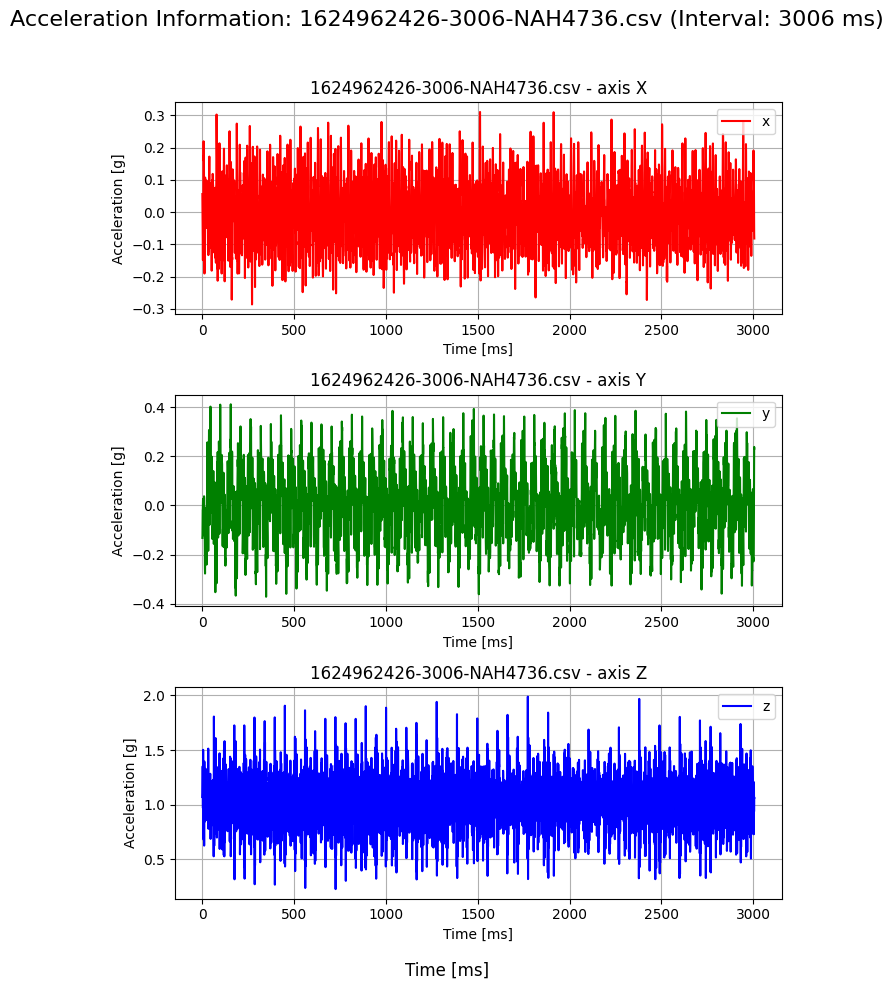

<Figure size 640x480 with 0 Axes>

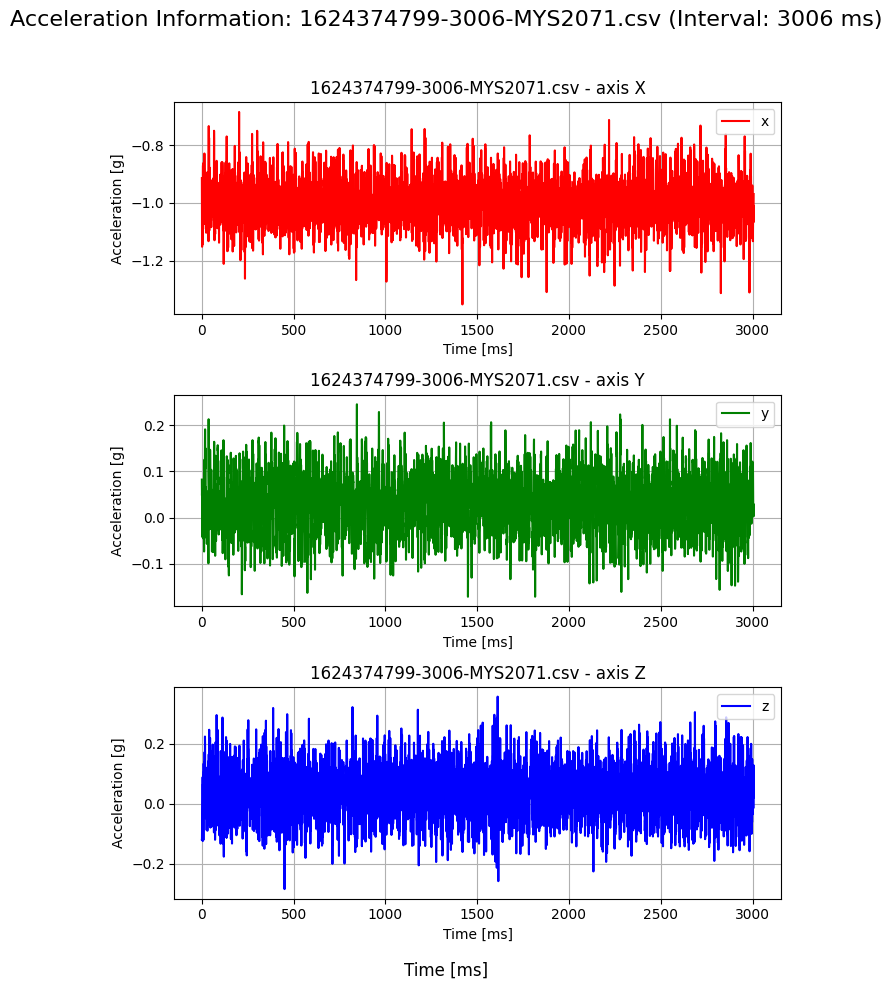

<Figure size 640x480 with 0 Axes>

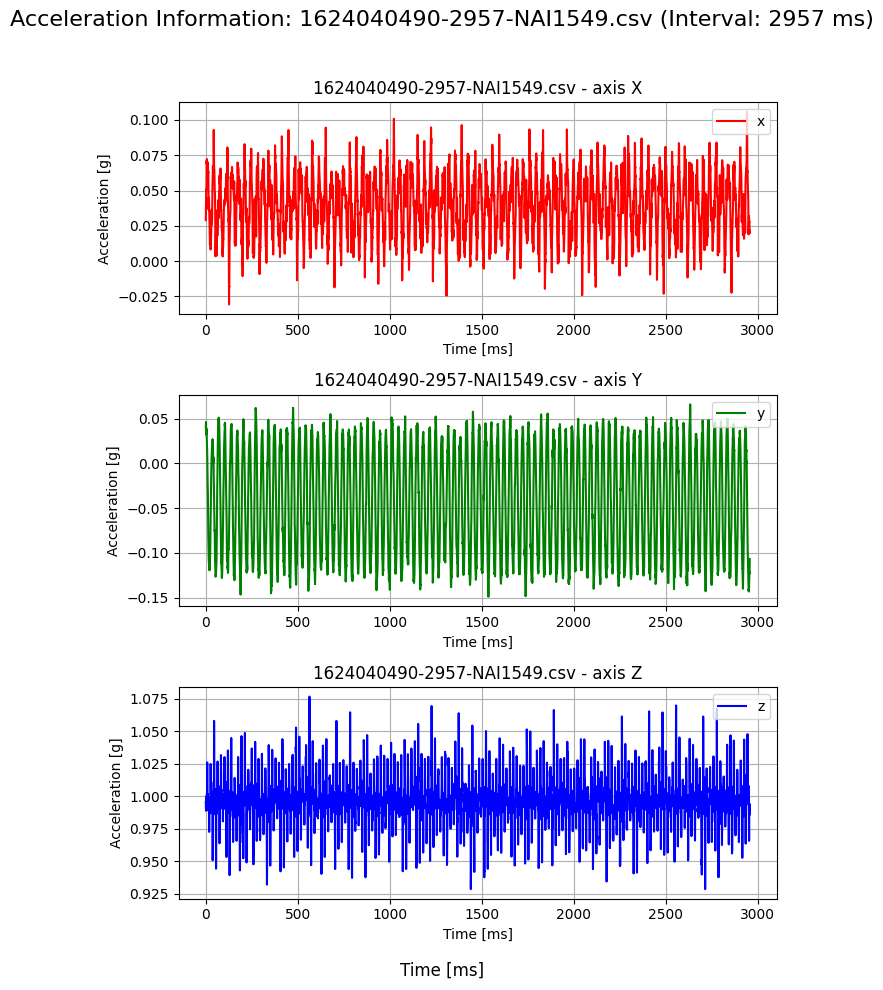

<Figure size 640x480 with 0 Axes>

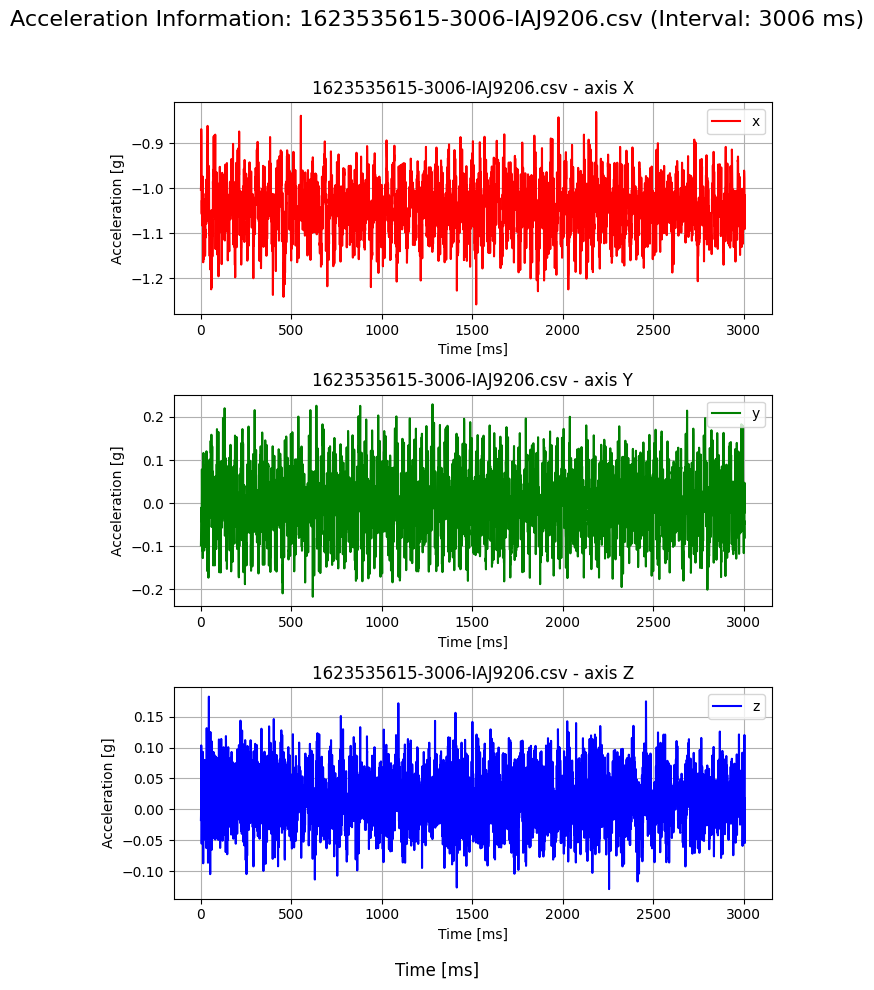

<Figure size 640x480 with 0 Axes>

In [ ]:
for file, content in df.items():
  signals = content['signals']
  interval = int(content['interval'])

  num_rows = len(signals)

  time = np.linspace(0, interval, num_rows)

  fig, axs = plt.subplots(3, 1, figsize=(7, 10))

  for key, value in enumerate(axis_colors.items()):

    axs[key].plot(time, signals[f'{value[0]}'], color=f'{value[1]}', label=f'{value[0]}')
    axs[key].set_title(f'{file} - axis {str(value[0]).upper()}')

  for ax in axs:
      ax.set_xlabel('Time [ms]')
      ax.set_ylabel('Acceleration [g]')
      ax.grid(True)
      ax.legend(loc='upper right')

  fig.suptitle(f'Acceleration Information: {file} (Interval: {interval} ms)', fontsize=16)
  fig.supxlabel('Time [ms]')

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

  plt.tight_layout()
  plt.show()


### 2. Apresentar os dados contidos nos arquivos no domínio da frequência (fft).

In [ ]:
def fft_calculate(signal, interval_ms, title, plot_Figure = False):
  num_samples = len(signal)
  fs = num_samples / (interval_ms / 1000)

  fft_values = np.fft.fft(signal)
  fft_freqs = np.fft.fftfreq(num_samples, 1 / fs)

  half_n = num_samples // 2
  fft_values = fft_values[:half_n]
  fft_freqs = fft_freqs[:half_n]

  if plot_Figure == True:

    plt.figure(figsize=(8, 4))
    plt.plot(fft_freqs, np.abs(fft_values), label='Spectrum Amplitude', color=f'{value[1]}')
    plt.title(f'FFT of the Signal - {title}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

  return fft_values, fft_freqs

___________________________________________________________________________________________________________________________________


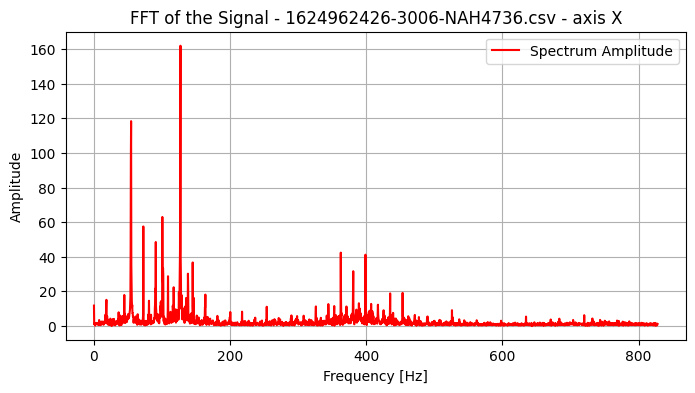

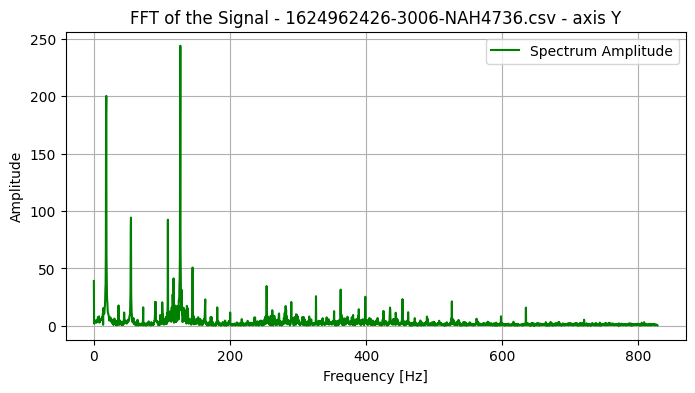

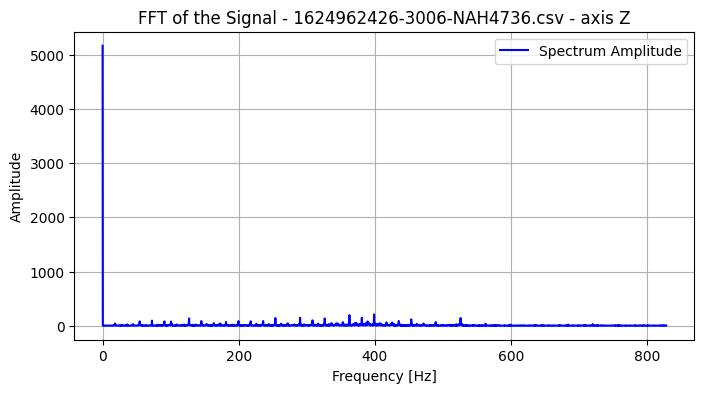

___________________________________________________________________________________________________________________________________


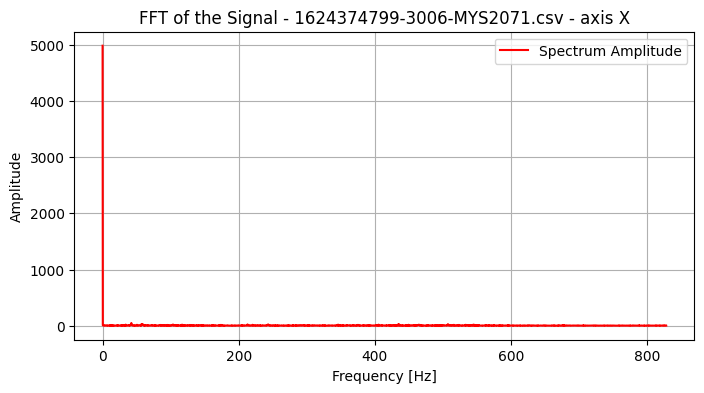

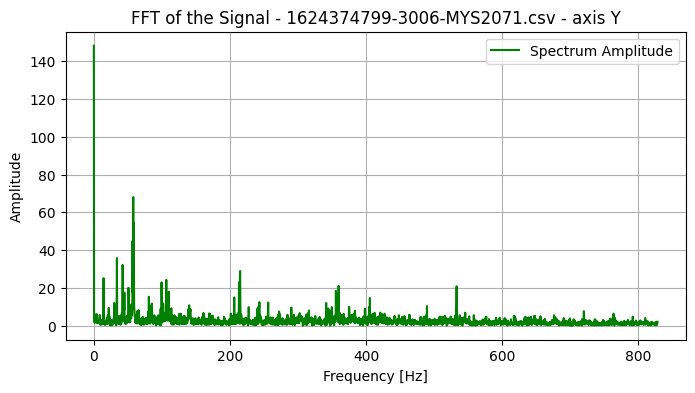

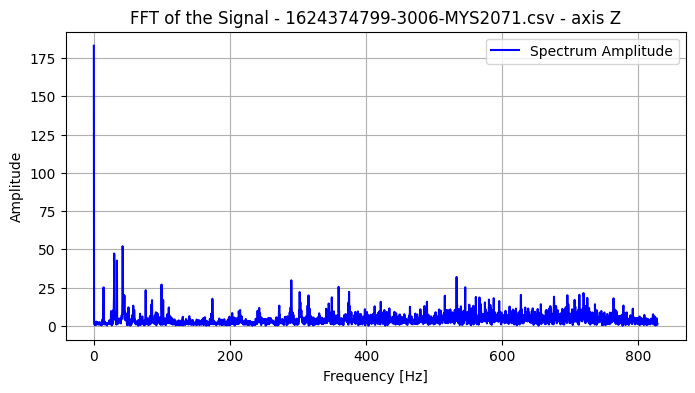

___________________________________________________________________________________________________________________________________


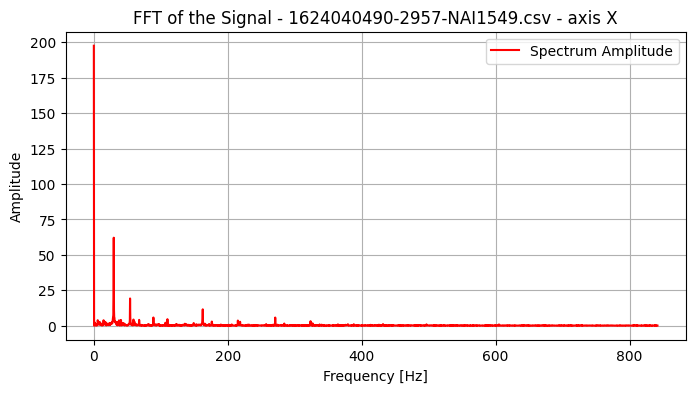

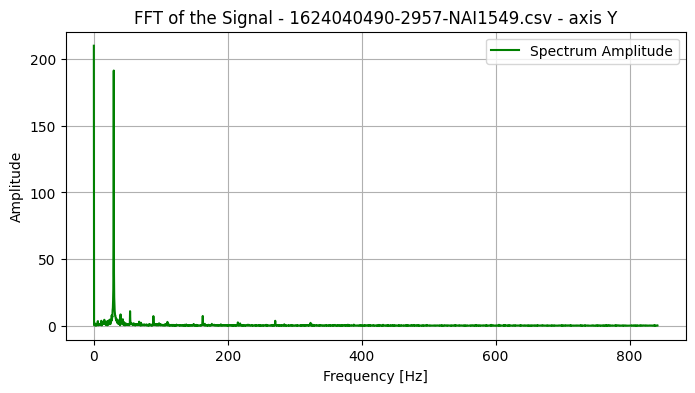

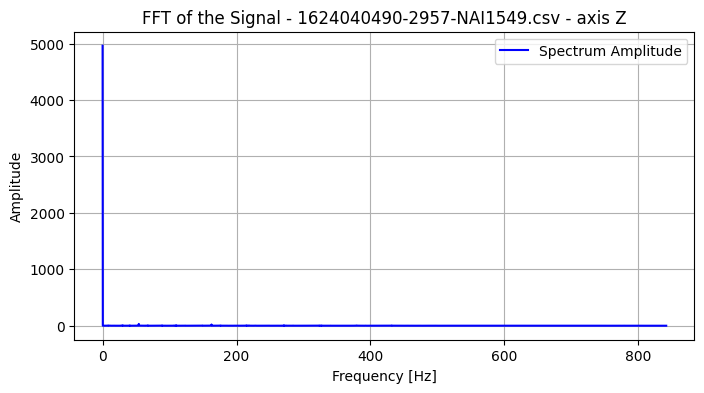

___________________________________________________________________________________________________________________________________


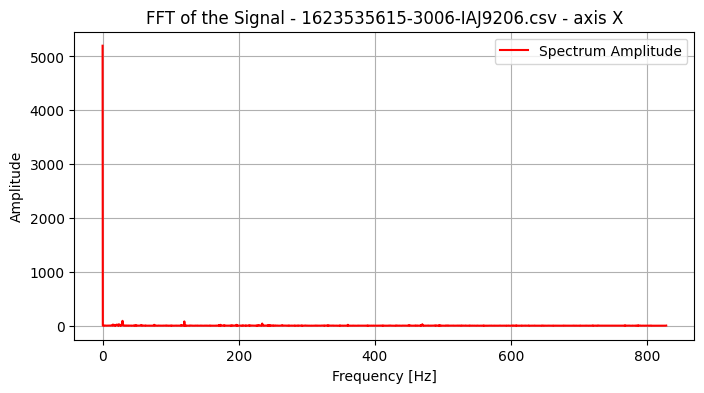

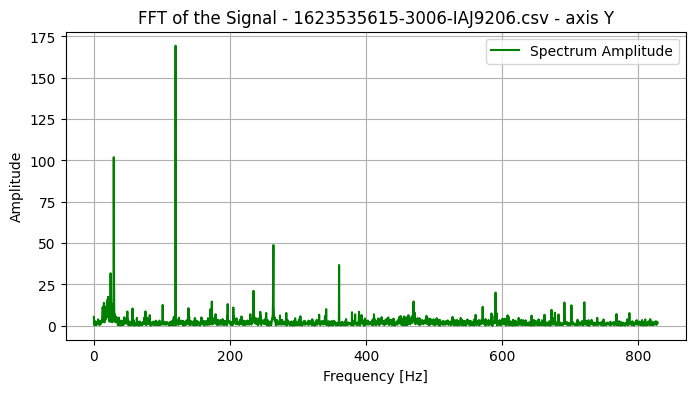

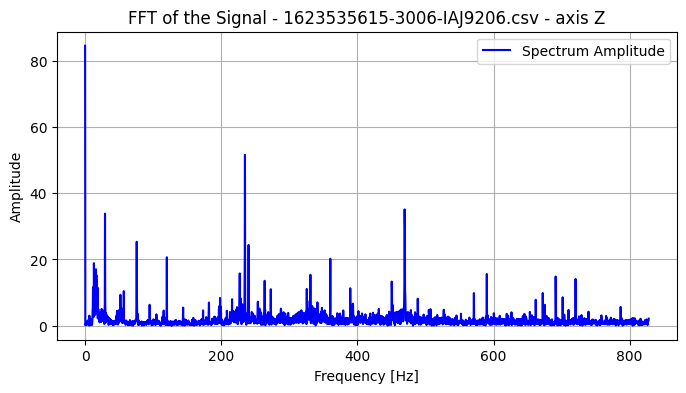

In [ ]:
for file, content in df.items():
  print('___________________________________________________________________________________________________________________________________')
  signals = content['signals']
  interval = int(content['interval'])
  for key, value in enumerate(axis_colors.items()):
    fft_calculate(signals[f'{value[0]}'], interval, f'{file} - axis {str(value[0]).upper()}', True)

### 3. Aplicar filtros, se necessário, para limpar e corrigir os sinais da melhor forma possível.

In [ ]:
def DC_level_remove(signal):
  signal = signal - signal.mean()
  return signal

In [ ]:
def butterworth_lowpass_filter(data, cutoff, fs, order=4):
  nyquist = 0.5 * fs
  normal_cutoff = cutoff / nyquist
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  filtered_data = filtfilt(b, a, data)
  return filtered_data

In [ ]:
def butterworth_highpass_filter(data, cutoff, fs, order=4):
  nyquist = 0.5 * fs
  normal_cutoff = cutoff / nyquist
  b, a = butter(order, normal_cutoff, btype='high', analog=False)
  filtered_data = filtfilt(b, a, data)
  return filtered_data

In [ ]:
def filter_signal(signal):
  signal_filtered_dc_level = DC_level_remove(signal)
  signal_filtered_lowpass = butterworth_lowpass_filter(signal_filtered_dc_level, cutoff=fs/4, fs=fs)
  signal_complete_filtered = butterworth_highpass_filter(signal_filtered_lowpass, cutoff=10, fs=fs)

  return signal_complete_filtered

Sampling Frequency: 1656.69 Hz


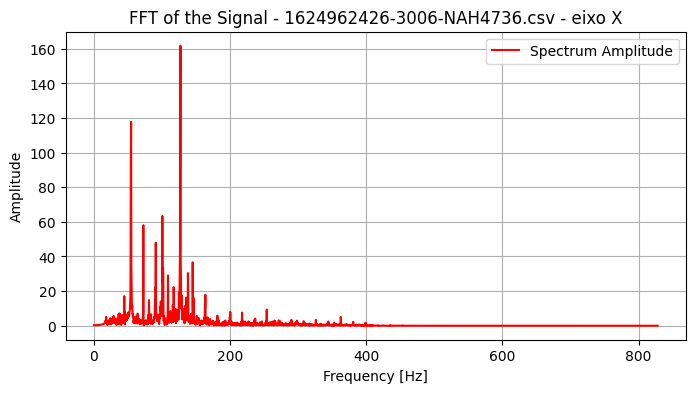

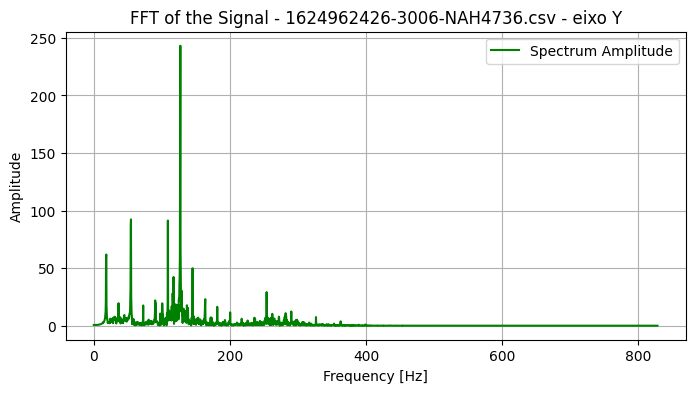

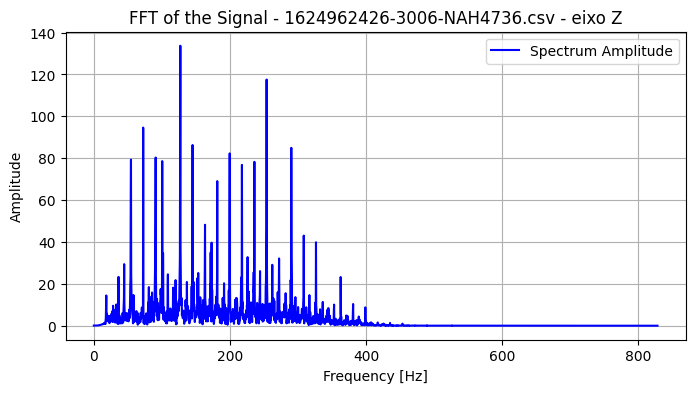

Sampling Frequency: 1656.69 Hz


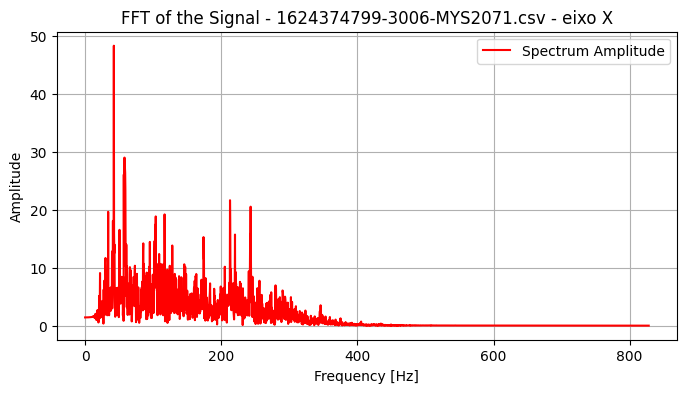

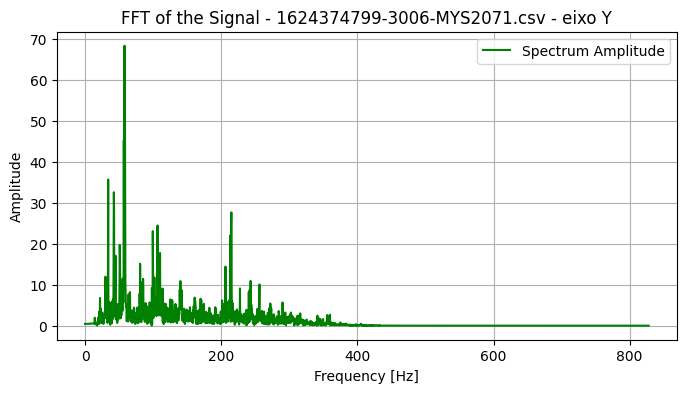

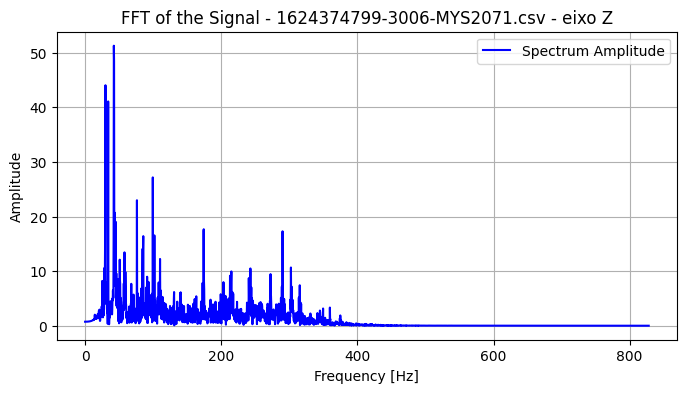

Sampling Frequency: 1684.14 Hz


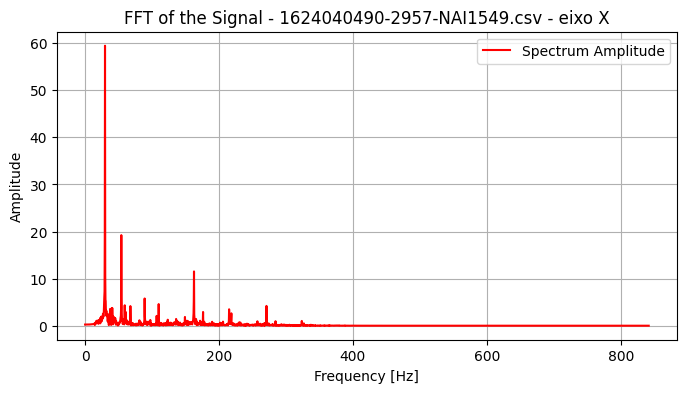

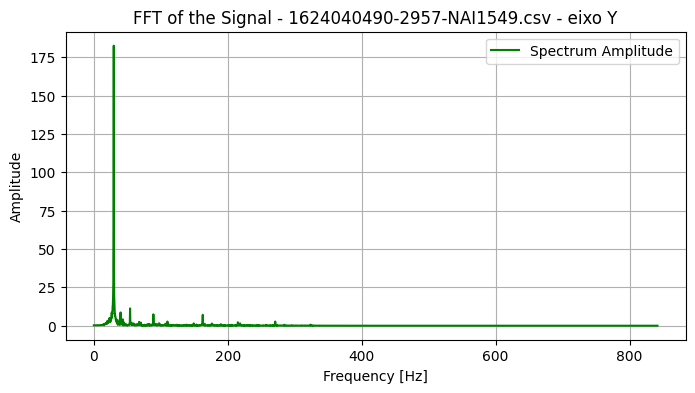

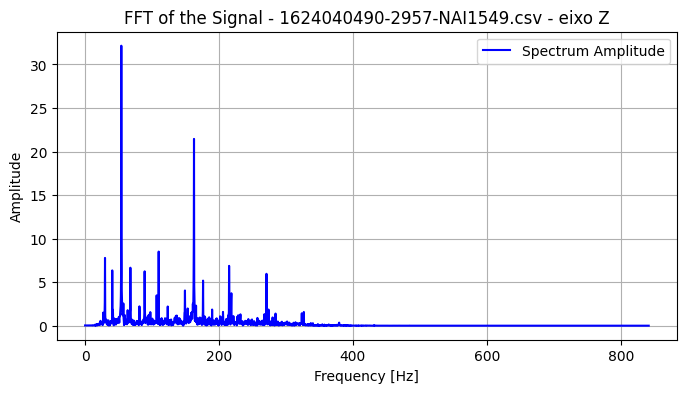

Sampling Frequency: 1656.69 Hz


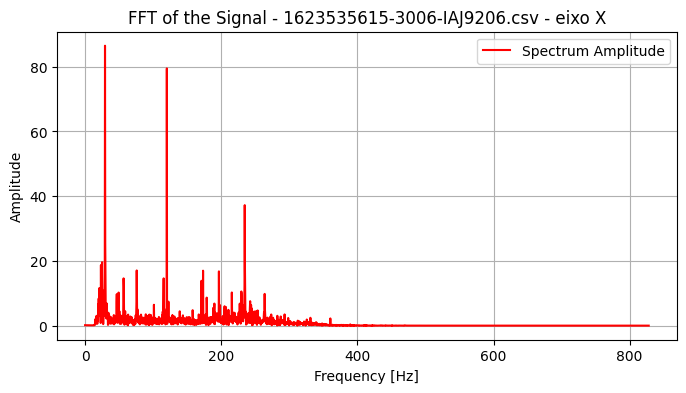

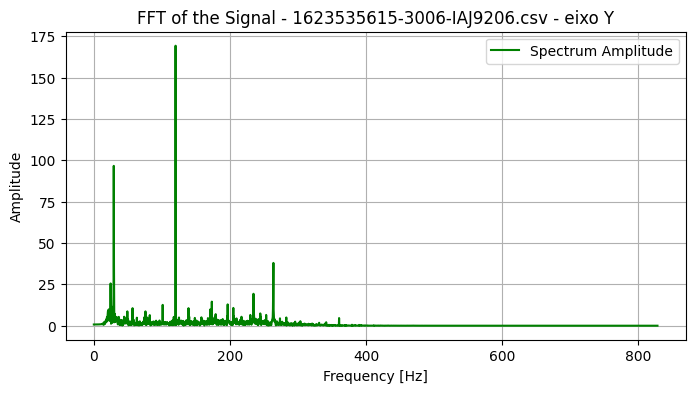

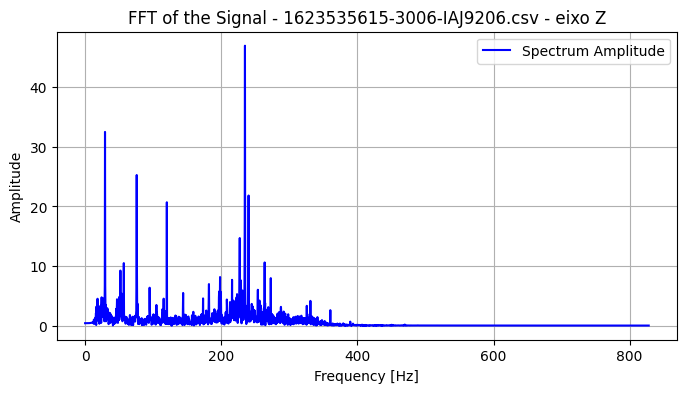

In [ ]:
for file, content in df.items():
  signals = content['signals']
  interval = int(content['interval'])
  num_rows = len(signals)
  fs = num_rows / (interval / 1000)

  print(f"Sampling Frequency: {fs:.2f} Hz")

  for key, value in enumerate(axis_colors.items()):
    signal_filtered = filter_signal(signals[f'{value[0]}'])
    fft_calculate(signal_filtered, interval, f'{file} - eixo {str(value[0]).upper()}', True)

### 4. Criar uma função capaz de identificar os harmônicos e picos no domínio da frequência, de maneira a reduzir a quantidade de dados e filtrar a informação relevante

In [ ]:
## função

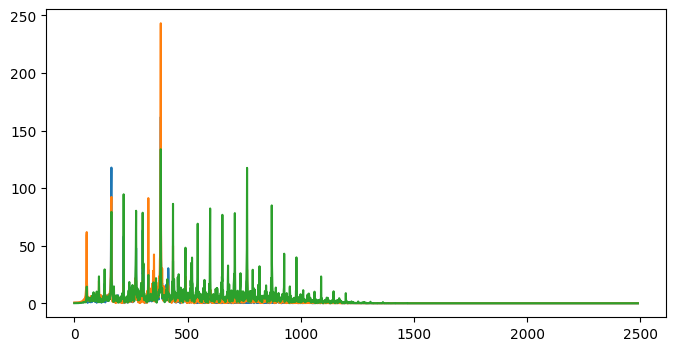

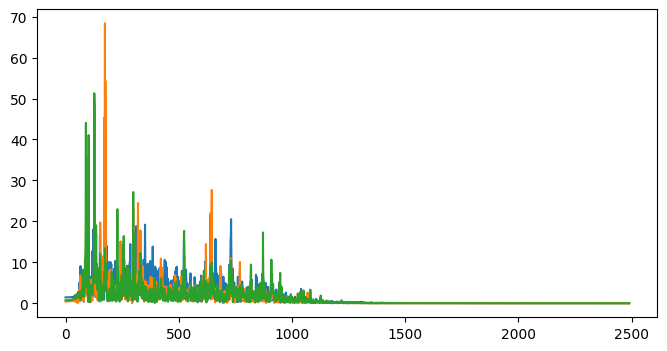

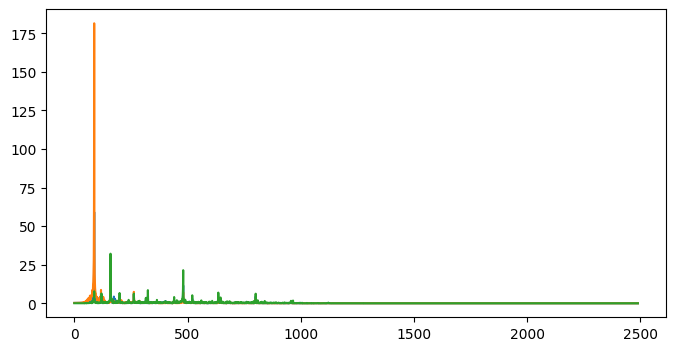

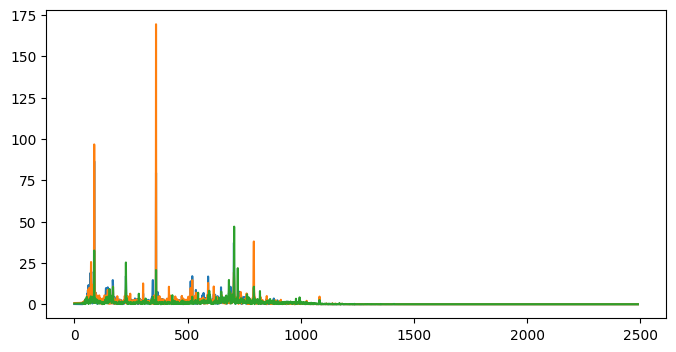

In [ ]:
for file, content in df.items():
  signals = content['signals']
  interval = int(content['interval'])

  plt.figure(figsize=(8, 4))
  for key, value in enumerate(axis_colors.items()):
    signal_filtered = filter_signal(signals[f'{value[0]}'])
    fft_values, fft_freqs = fft_calculate(signal_filtered, interval, f'{file} - Finding Harmonics and Peaks - eixo {str(value[0]).upper()}')
    plt.plot(np.abs(fft_values))

## Parte 2 - Machine Learning, Deep learning e Data Driven Solutions


In [27]:
import os
import ast
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cluster import KMeans
from IPython.display import display

### 1 . Apresentar visualmente os dados contidos em cada arquivo, juntamente com as informações do ativo a que pertencem.

In [28]:
df_assets = pd.read_csv(f'/content/part_2/assets.csv')
df_collects = pd.read_csv(f'/content/part_2/collects.csv')

In [ ]:
print(df_assets.columns)
print(df_collects.columns)


Index(['_id', 'company', 'createdAt', 'description', 'model', 'modelType',
       'name', 'sensors', 'specifications.axisX', 'specifications.axisY',
       'specifications.axisZ', 'specifications.maxDowntime',
       'specifications.maxTemp', 'specifications.power', 'specifications.rpm',
       'specifications.workdays'],
      dtype='object')
Index(['_id', 'createdAt', 'params.accelRMS.x', 'params.accelRMS.y',
       'params.accelRMS.z', 'params.duration', 'params.sampRate',
       'params.timeStart', 'params.velRMS.x', 'params.velRMS.y',
       'params.velRMS.z', 'sensorId', 'temp'],
      dtype='object')


In [29]:
df_collects['sensorId'] = df_collects['sensorId'].astype(str).str.strip()
df_assets['sensors'] = df_assets['sensors'].apply(lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else x)
df_assets['sensors'] = df_assets['sensors'].astype(str).str.strip()

# print(df_collects['sensorId'])
print(df_assets['sensors'].tolist())

['IAJ9206', 'LZY4270', 'MUR8453', 'MXK6435', 'MYD8706', 'MYS2071', 'MZU6388', 'NAH4736', 'NAI1549', 'NEW4797']


In [44]:
merged_df = pd.merge(df_collects, df_assets, left_on='sensorId', right_on='sensors', how='inner')

display(merged_df)

_id_x               createdAt_x  params.accelRMS.x  \
0      60b57955f77013684c413e39  2021-06-01T00:03:33.370Z           0.010463   
1      60b57c53f77013684c41409f  2021-06-01T00:16:19.173Z           0.011437   
2      60b57f34f77013684c4142cd  2021-06-01T00:28:36.553Z           0.010494   
3      60b58237f77013684c41450c  2021-06-01T00:41:27.622Z           0.009859   
4      60b58515f77013684c414765  2021-06-01T00:53:41.450Z           0.010014   
...                         ...                       ...                ...   
33896  60e4ee0b35645405b62ea2f5  2021-07-06T23:58:03.000Z           0.048851   
33897  60e4f20435645405b62ea5b4  2021-07-07T00:15:00.431Z           0.049630   
33898  60e4f62635645405b62ea8b5  2021-07-07T00:32:38.904Z           0.048705   
33899  60e4fa6035645405b62eabaf  2021-07-07T00:50:40.423Z           0.049600   
33900  60e4fea535645405b62eaea0  2021-07-07T01:08:53.311Z           0.018091   

       params.accelRMS.y  params.accelRMS.z  params.duration  params.sampRate  \
0               0.004463           0.011677            3.006      1656.686627   
1               0.004983           0.011482            3.006      1656.686627   
2               0.005024           0.011120            3.006      1656.686627   
3               0.004786           0.011096            3.006      1656.686627   
4               0.005213           0.011332            3.006      1656.686627   
...                  ...                ...              ...              ...   
33896           0.080684           0.063319            2.710      1527.306273   
33897           0.084657           0.065195            2.710      1527.306273   
33898           0.069750           0.132227            2.712      1526.179941   
33899           0.068588           0.131735            2.711      1526.742899   
33900           0.024482           0.020937            2.711      1526.742899   

       params.timeStart  params.velRMS.x  params.velRMS.y  ...  \
0          1.622506e+09         0.000511         0.000176  ...   
1          1.622507e+09         0.000633         0.000238  ...   
2          1.622507e+09         0.000524         0.000226  ...   
3          1.622508e+09         0.000437         0.000220  ...   
4          1.622509e+09         0.000501         0.000251  ...   
...                 ...              ...              ...  ...   
33896      1.625616e+09         0.000762         0.001369  ...   
33897      1.625617e+09         0.000791         0.001380  ...   
33898      1.625618e+09         0.000725         0.001206  ...   
33899      1.625619e+09         0.000740         0.001337  ...   
33900      1.625620e+09         0.000342         0.000486  ...   

                                                    name  sensors  \
0      Ventilador Acima do Elemento GA160 FF - Prédio...  IAJ9206   
1      Ventilador Acima do Elemento GA160 FF - Prédio...  IAJ9206   
2      Ventilador Acima do Elemento GA160 FF - Prédio...  IAJ9206   
3      Ventilador Acima do Elemento GA160 FF - Prédio...  IAJ9206   
4      Ventilador Acima do Elemento GA160 FF - Prédio...  IAJ9206   
...                                                  ...      ...   
33896                                  ROTULADORA SIDEL   NEW4797   
33897                                  ROTULADORA SIDEL   NEW4797   
33898                                  ROTULADORA SIDEL   NEW4797   
33899                                  ROTULADORA SIDEL   NEW4797   
33900                                  ROTULADORA SIDEL   NEW4797   

       specifications.axisX specifications.axisY specifications.axisZ  \
0                  vertical           horizontal                axial   
1                  vertical           horizontal                axial   
2                  vertical           horizontal                axial   
3                  vertical           horizontal                axial   
4                  vertical           horizontal                axial   
...                     ...     

### 2. Desenvolver um modelo/função capaz de calcular o tempo de downtime e uptime para um ativo qualquer

In [69]:
def calculate_baseline(signal, print_info=False):
    # Ensure signal is a NumPy array
    signal = np.asarray(signal, dtype=np.float64)

    # Remove NaN values and print the remaining length
    signal = signal[~np.isnan(signal)]
    if print_info == True:
      print(f"Filtered NaNs - Signal length: {len(signal)}")

    if len(signal) == 0:
        print("Signal is empty after removing NaNs.")
        return np.nan

    # Calculate Q1 and Q3
    Q1 = np.percentile(signal, 25)
    Q3 = np.percentile(signal, 75)
    if print_info == True:
      print(f"Q1: {Q1}, Q3: {Q3}")

    # Compute IQR (Interquartile Range)
    IQR = Q3 - Q1
    if print_info == True:
      print(f"IQR: {IQR}")

    # Set bounds for filtering outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if print_info == True:
      print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    # Filter the signal, excluding outliers
    signal_no_outliers = signal[(signal >= lower_bound) & (signal <= upper_bound)]
    if print_info == True:
      print(f"Filtered signal length: {len(signal_no_outliers)}")

    if len(signal_no_outliers) == 0:
        print("No data left after filtering outliers.")
        return np.nan

    # Calculate the baseline
    baseline = np.mean(signal_no_outliers)
    if print_info == True:
      print(f"Baseline: {baseline}")

    return baseline

In [32]:
def plot_figure(signal, baseline):
  # Create a line plot
  plt.figure(figsize=(10, 6))
  plt.plot(signal, label='Velocity (mm/s)', color='blue', marker='o')
  plt.axhline(y=baseline, color='r', linestyle='-', label='Baseline (mean)')
  # Customize the plot
  plt.title('Speed Over Time')
  plt.xlabel('Time (or Index)')
  plt.ylabel('mm/s')
  plt.legend()
  plt.grid(True)  # Optional: adds a grid for better visualization
  plt.show()

In [65]:
def calculate_mode(signal):
    # Ensure the signal is a NumPy array
    signal = np.asarray(signal)

    # Calculate the mode
    mode_value, count = mode(signal, nan_policy='omit')

    print(f"Mode: {mode_value}, Count: {count}")
    return mode_value

In [71]:
def calculate_uptime_downtime(asset, merged_df):
  filtered_df = merged_df[merged_df['sensorId'] == asset]

  dict_analysis_uptime_downtime =  {'x': [], 'y': [], 'z': [], 'params.timeStart': []}

  df_velocities_timeStart = filtered_df[['params.velRMS.x', 'params.velRMS.y', 'params.velRMS.z', 'params.timeStart']].dropna()
  df_velocities_timeStart_clean = df_velocities_timeStart.dropna()
  dict_analysis_uptime_downtime['params.timeStart'] = df_velocities_timeStart_clean['params.timeStart'].values

  baseline_x = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.x'].values)
  baseline_y = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.y'].values)
  baseline_z = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.z'].values)

  for _, row in df_velocities_timeStart_clean.iterrows():
    dict_analysis_uptime_downtime['x'].append('downtime' if row['params.velRMS.x'] < baseline_x else 'uptime')
    dict_analysis_uptime_downtime['y'].append('downtime' if row['params.velRMS.y'] < baseline_y else 'uptime')
    dict_analysis_uptime_downtime['z'].append('downtime' if row['params.velRMS.z'] < baseline_z else 'uptime')

  df_analysis_uptime_downtime = pd.DataFrame(dict_analysis_uptime_downtime)
  df_analysis_uptime_downtime['final_result'] = df_analysis_uptime_downtime[['x', 'y', 'z']].mode(axis=1)

  downtime = 0
  uptime = 0

  for key, value in enumerate(df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values):
    if key < len(df_analysis_uptime_downtime['final_result'].values)-1:
      status = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key][1]
      current_time = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key][0]
      next_time = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key + 1][0]

      if not (np.isnan(current_time) or np.isnan(next_time)):
              if status == 'downtime':
                  downtime += int(next_time) - int(current_time)
              else:
                  uptime += int(next_time) - int(current_time)

  print(f'Total Uptime: {(uptime/3600):.2f}h')
  print(f'Total Downtime: {(downtime/3600):.2f}h')
  print(f'Total Acquistion Time: {(downtime+uptime)/3600:.2f}h')




In [72]:
asset = 'IAJ9206'
calculate_uptime_downtime(asset, merged_df)

Total Uptime: 463.22h
Total Downtime: 401.83h
Total Acquistion Time: 865.06h


In [37]:
asset = 'MXK6435'
filtered_df = merged_df[merged_df['sensorId'] == asset]

df_analysis_uptime_downtime = dict()
df_analysis_uptime_downtime['x'] = list()
df_analysis_uptime_downtime['y'] = list()
df_analysis_uptime_downtime['z'] = list()

df_velocities_timeStart = filtered_df[['params.velRMS.x', 'params.velRMS.y', 'params.velRMS.z', 'params.timeStart']]
df_velocities_timeStart_clean = df_velocities_timeStart.dropna()
df_analysis_uptime_downtime['params.timeStart'] = df_velocities_timeStart_clean['params.timeStart'].values

baseline_x = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.x'].values)
baseline_y = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.y'].values)
baseline_z = calculate_baseline(df_velocities_timeStart_clean['params.velRMS.z'].values)


for key, value in enumerate(df_velocities_timeStart_clean['params.velRMS.x'].values):
  if key < len(df_velocities_timeStart_clean['params.velRMS.x'].values):

      if value < baseline_x:
          df_analysis_uptime_downtime['x'].append('downtime')
      else:
          df_analysis_uptime_downtime['x'].append('uptime')

for key, value in enumerate(df_velocities_timeStart_clean['params.velRMS.y'].values):
  if key < len(df_velocities_timeStart_clean['params.velRMS.y'].values):

      if value < baseline_y:
          df_analysis_uptime_downtime['y'].append('downtime')
      else:
          df_analysis_uptime_downtime['y'].append('uptime')

for key, value in enumerate(df_velocities_timeStart_clean['params.velRMS.z'].values):
  if key < len(df_velocities_timeStart_clean['params.velRMS.z'].values):

      if value < baseline_z:
          df_analysis_uptime_downtime['z'].append('downtime')
      else:
          df_analysis_uptime_downtime['z'].append('uptime')

df_analysis_uptime_downtime['params.timeStart'] = df_analysis_uptime_downtime['params.timeStart']


df_analysis_uptime_downtime = pd.DataFrame(df_analysis_uptime_downtime)
df_analysis_uptime_downtime['final_result'] = df_analysis_uptime_downtime[['x', 'y', 'z']].mode(axis=1)

downtime = 0
uptime = 0

for key, value in enumerate(df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values):
  if key < len(df_analysis_uptime_downtime['final_result'].values)-1:
    status = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key][1]
    current_time = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key][0]
    next_time = df_analysis_uptime_downtime[['params.timeStart', 'final_result']].values[key + 1][0]

    if not (np.isnan(current_time) or np.isnan(next_time)):
            if status == 'downtime':
                downtime += int(next_time) - int(current_time)
            else:
                uptime += int(next_time) - int(current_time)

print(downtime / 3600, uptime / 3600)



Filtered NaNs - Signal length: 3806
Q1: 7.2e-05, Q3: 0.000205
IQR: 0.00013299999999999998
Lower bound: -0.00012749999999999995, Upper bound: 0.00040449999999999997
Filtered signal length: 3382
Baseline: 0.00013211649911295094
Filtered NaNs - Signal length: 3806
Q1: 5.2249999999999996e-05, Q3: 0.000123
IQR: 7.075000000000001e-05
Lower bound: -5.387500000000002e-05, Upper bound: 0.00022912500000000003
Filtered signal length: 3376
Baseline: 7.205420616113744e-05
Filtered NaNs - Signal length: 3806
Q1: 0.000125, Q3: 0.000161
IQR: 3.600000000000001e-05
Lower bound: 7.099999999999999e-05, Upper bound: 0.00021500000000000002
Filtered signal length: 3262
Baseline: 0.00013739301042305335
495.5313888888889 369.4511111111111


In [ ]:
asset = 'IAJ9206'
filtered_df = merged_df[merged_df['sensorId'] == asset]
vel_rms_axis_x = filtered_df[['params.velRMS.x', 'params.timeStart']]
vel_rms_axis_x_clean = vel_rms_axis_x.dropna()

print(len(filtered_df['params.velRMS.x'].values), len(filtered_df['params.timeStart'].values))

baseline_x = calculate_baseline(vel_rms_axis_x_clean['params.velRMS.x'].values)
downtime = 0
uptime = 0

for key, value in enumerate(vel_rms_axis_x_clean.values):
    if key < len(vel_rms_axis_x_clean.values) - 1:

        current_time = vel_rms_axis_x_clean.values[key][1]
        next_time = vel_rms_axis_x_clean.values[key + 1][1]

        if not (np.isnan(current_time) or np.isnan(next_time)):
            if value[0] < baseline_x:
                downtime += int(next_time) - int(current_time)
            else:
                uptime += int(next_time) - int(current_time)

print(downtime / 3600, uptime / 3600)


3986 3986
Filtered NaNs - Signal length: 3926
Q1: 0.000219, Q3: 0.0006505
IQR: 0.0004315
Lower bound: -0.00042825000000000003, Upper bound: 0.00129775
Filtered signal length: 3054
Baseline: 0.00029201669941060905
481.15222222222224 383.90472222222223


In [ ]:
asset = 'IAJ9206'
filtered_df = merged_df[merged_df['sensorId'] == asset]
vel_rms_axis_y = filtered_df[['params.velRMS.y', 'params.timeStart']]
vel_rms_axis_y_clean = vel_rms_axis_y.dropna()

baseline_y = calculate_baseline(vel_rms_axis_y_clean['params.velRMS.y'].values)
downtime = 0
uptime = 0

for key, value in enumerate(vel_rms_axis_y_clean.values):
    if key < len(vel_rms_axis_y_clean.values) - 1:

        current_time = vel_rms_axis_y_clean.values[key][1]
        next_time = vel_rms_axis_y_clean.values[key + 1][1]

        if not (np.isnan(current_time) or np.isnan(next_time)):
            if value[0] < baseline_y:
                downtime += int(next_time) - int(current_time)
            else:
                uptime += int(next_time) - int(current_time)

print(downtime / 3600, uptime / 3600)

Filtered NaNs - Signal length: 3926
Q1: 0.000136, Q3: 0.000418
IQR: 0.000282
Lower bound: -0.00028700000000000004, Upper bound: 0.0008410000000000001
Filtered signal length: 3054
Baseline: 0.00020220792403405368
364.3175 500.7394444444444


In [ ]:
asset = 'IAJ9206'
filtered_df = merged_df[merged_df['sensorId'] == asset]
vel_rms_axis_z = filtered_df[['params.velRMS.z', 'params.timeStart']]
vel_rms_axis_z_clean = vel_rms_axis_z.dropna()

baseline_z = calculate_baseline(vel_rms_axis_z_clean['params.velRMS.z'].values)
downtime = 0
uptime = 0

for key, value in enumerate(vel_rms_axis_z_clean.values):
    if key < len(vel_rms_axis_z_clean.values) - 1:

        current_time = vel_rms_axis_z_clean.values[key][1]
        next_time = vel_rms_axis_z_clean.values[key + 1][1]

        if not (np.isnan(current_time) or np.isnan(next_time)):
            if value[0] < baseline_z:
                downtime += int(next_time) - int(current_time)
            else:
                uptime += int(next_time) - int(current_time)

print(downtime / 3600, uptime / 3600)

Filtered NaNs - Signal length: 3926
Q1: 0.000204, Q3: 0.00031875
IQR: 0.00011475000000000002
Lower bound: 3.1874999999999975e-05, Upper bound: 0.000490875
Filtered signal length: 3052
Baseline: 0.00023352981651376148
392.8777777777778 472.1791666666667


In [ ]:
filtered_df['params.timeStart'] = pd.to_numeric(filtered_df['params.timeStart'], errors='coerce')

# Drop NaNs in the time column
filtered_df = filtered_df.dropna(subset=['params.timeStart'])

# Calculate the total time (in seconds)
total_time_seconds = filtered_df['params.timeStart'].max() - filtered_df['params.timeStart'].min()

# Convert to hours, minutes, and seconds
total_hours = total_time_seconds // 3600
total_minutes = (total_time_seconds % 3600) // 60
total_seconds = total_time_seconds % 60

print(f"Total Time: {int(total_hours)} hours, {int(total_minutes)} minutes, {int(total_seconds)} seconds")

Total Time: 865 hours, 3 minutes, 25 seconds


<ipython-input-56-473a20f3c9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['params.timeStart'] = pd.to_numeric(filtered_df['params.timeStart'], errors='coerce')


Filtered NaNs - Signal length: 3926
Q1: 0.000219, Q3: 0.0006505
IQR: 0.0004315
Lower bound: -0.00042825000000000003, Upper bound: 0.00129775
Filtered signal length: 3054
Baseline: 0.00029201669941060905


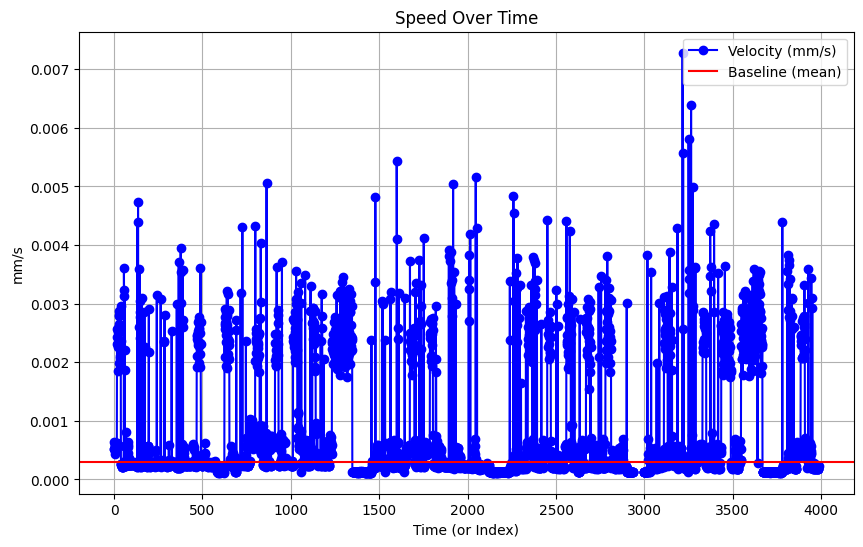

Filtered NaNs - Signal length: 3926
Q1: 0.000136, Q3: 0.000418
IQR: 0.000282
Lower bound: -0.00028700000000000004, Upper bound: 0.0008410000000000001
Filtered signal length: 3054
Baseline: 0.00020220792403405368


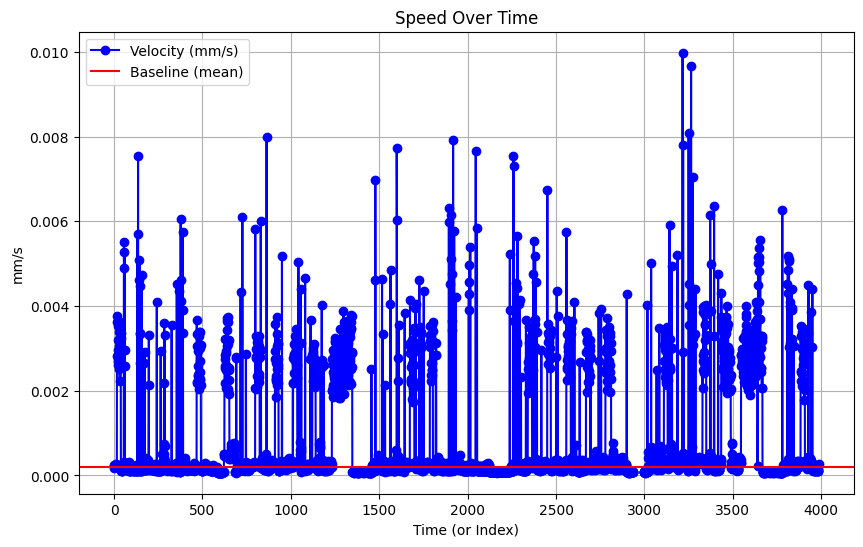

Filtered NaNs - Signal length: 3926
Q1: 0.000204, Q3: 0.00031875
IQR: 0.00011475000000000002
Lower bound: 3.1874999999999975e-05, Upper bound: 0.000490875
Filtered signal length: 3052
Baseline: 0.00023352981651376148


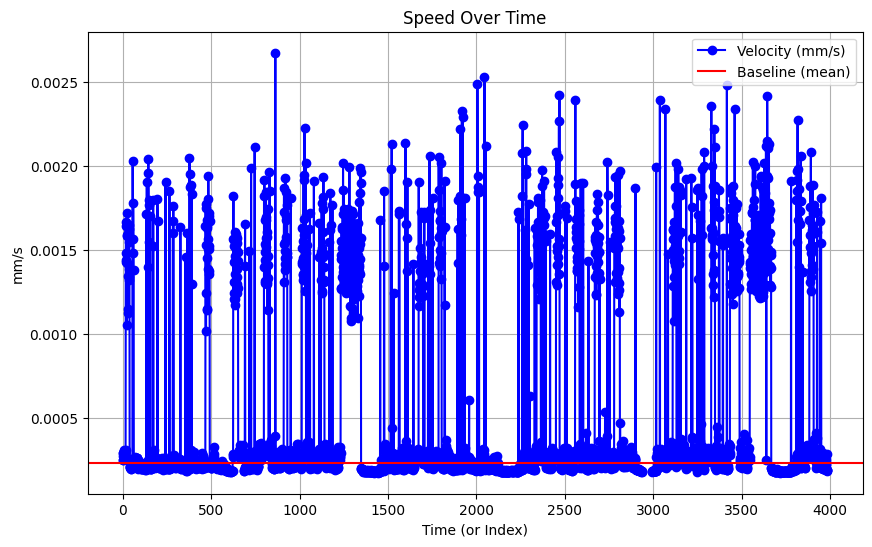

In [ ]:

asset = 'IAJ9206'
filtered_df = merged_df[merged_df['sensorId'] == asset]
accel_rms_axis_x = filtered_df['params.accelRMS.x', 'params.timeStart']

vel_rms_axis_x = filtered_df['params.velRMS.x']
baseline = calculate_baseline(vel_rms_axis_x.values)
plot_figure(vel_rms_axis_x, baseline)
vel_rms_axis_y = filtered_df['params.velRMS.y']
baseline = calculate_baseline(vel_rms_axis_y.values)
plot_figure(vel_rms_axis_y, baseline)
vel_rms_axis_z = filtered_df['params.velRMS.z']
baseline = calculate_baseline(vel_rms_axis_z.values)
plot_figure(vel_rms_axis_z, baseline)


### 3. Desenvolver um modelo/função capaz de identificar mudanças nos padrões de vibração para um ativo qualquer.



In [ ]:
### USAR AMPLITUDE DE PICO A PICO

In [ ]:
def find_pattern_change(asset):
  filtered_df = merged_df[merged_df['sensorId'] == asset]
  signals = filtered_df.iloc[:, [2,3,4]]
  signals = signals.dropna()
  X = signals.values
  wcss = []
  for i in range(1, 11):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
  plt.plot(range(1, 11), wcss)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()
  ## média móvel
  ## threshold
  ## retornar o index da coleta


In [ ]:
asset = 'IAJ9206'
filtered_df = merged_df[merged_df['sensorId'] == asset]


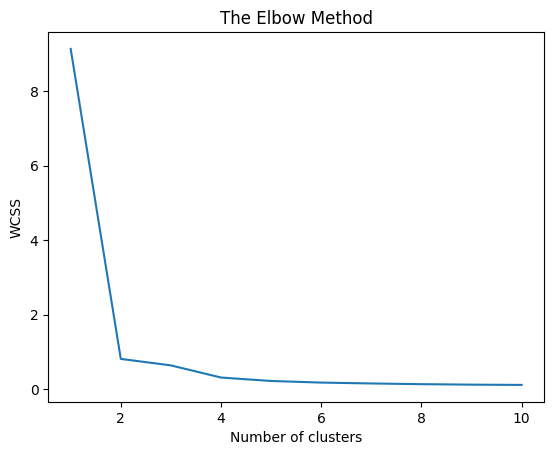

In [ ]:
signals = filtered_df.iloc[:, [2,3,4]]
signals = signals.dropna()
X = signals.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

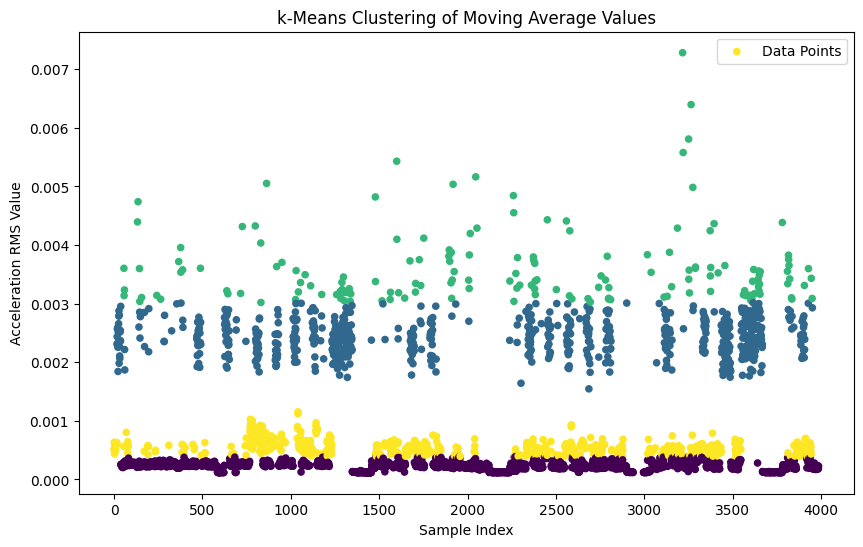

In [ ]:
accelRMS_x = pd.Series(filtered_df['params.accelRMS.x'].dropna())
accelRMS_y = pd.Series(filtered_df['params.accelRMS.y'].dropna())
accelRMS_z = pd.Series(filtered_df['params.accelRMS.z'].dropna())
velRMS_x = pd.Series(filtered_df['params.velRMS.x'].dropna())
k_means_clustering(velRMS_x.to_frame(), 4, 'Moving Average')
velRMS_y = pd.Series(filtered_df['params.velRMS.y'].dropna())
velRMS_z = pd.Series(filtered_df['params.velRMS.z'].dropna())

In [ ]:
def k_means_clustering(signal, num_clusters, title):

  # Create a k-Means instance and fit to the data
  kmeans = KMeans(n_clusters=num_clusters, random_state=42)
  clusters = kmeans.fit_predict(signal)

  # Plotting k-Means clustering results
  plt.figure(figsize=(10, 6))
  plt.scatter(signal.index, signal, c=clusters, cmap='viridis', marker='o', s=20, label='Data Points')
  plt.title(f'k-Means Clustering of {title} Values')
  plt.xlabel('Sample Index')
  plt.ylabel('Acceleration RMS Value')
  plt.legend()
  plt.show()

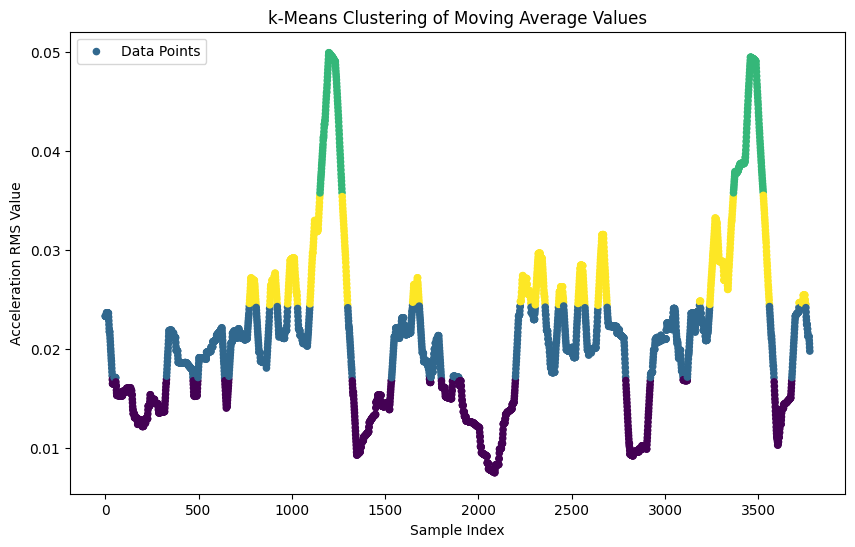

In [ ]:
window_size = 150 #pontos
accelRMS_x_moving_average_mean = accelRMS_x.rolling(window_size).mean().dropna()
accelRMS_x_df = accelRMS_x_moving_average_mean.reset_index(drop=True).to_frame()
k_means_clustering(accelRMS_x_df, 4, 'Moving Average')
accelRMs_x = accelRMS_x.dropna().values.reshape(-1, 1)
accelRMS_x_moving_average_std = accelRMS_x.rolling(window_size).std()
accelRMS_x_moving_average_kurtosis = accelRMS_x.rolling(window_size).apply(pd.Series.kurt)
accelRMS_x_moving_average_skewness = accelRMS_x.rolling(100).apply(pd.Series.skew)


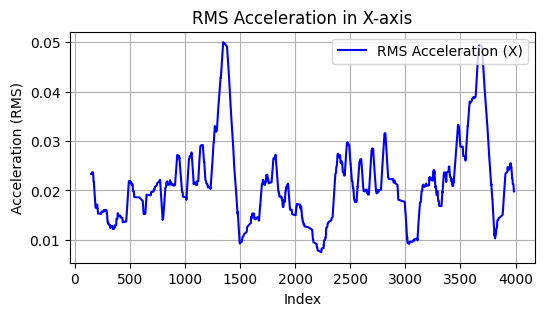

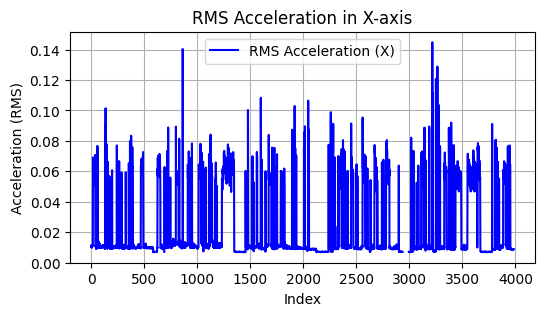

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(accelRMS_x_moving_average_mean, label='RMS Acceleration (X)', color='b')
plt.title('RMS Acceleration in X-axis')
plt.xlabel('Index')
plt.ylabel('Acceleration (RMS)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
plt.plot(filtered_df['params.accelRMS.x'], label='RMS Acceleration (X)', color='b')
plt.title('RMS Acceleration in X-axis')
plt.xlabel('Index')
plt.ylabel('Acceleration (RMS)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

<ipython-input-260-16f353fd1f37>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, cmap = 'viridis', label = 'Cluster 1')
<ipython-input-260-16f353fd1f37>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, cmap = 'viridis', label = 'Cluster 2')
<ipython-input-260-16f353fd1f37>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, cmap = 'viridis', label = 'Cluster 3')
<ipython-input-260-16f353fd1f37>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, cmap = 'viridis', label = 'Cluster 4')


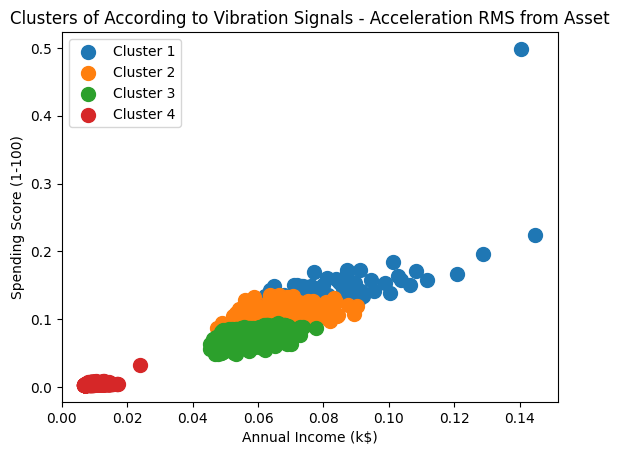

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, cmap = 'viridis', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, cmap = 'viridis', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, cmap = 'viridis', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, cmap = 'viridis', label = 'Cluster 4')
plt.title('Clusters of According to Vibration Signals - Acceleration RMS from Asset')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 4. Identificar possíveis falhas nos ativos utilizando o modelo desenvolvido no item 3 ou um novo modelo (a identificação deve ser autônoma e não uma análise visual).

##### Considerations:

*  The average values of the RMS signals ​​will be considered as a reference to analysis as a normal condition
*   Failures will be considered values ​​outside the margin of 3 standard deviations (μ +/- 3σ)
*   System Anomaly Detection is considered when it is classified in at least 2 axis






Analysis for IAJ9206
Mean: 0.02, Standard Deviation: 0.02
Upper Limit: 0.09, Lower Limit: -0.05
Number of anomalies detected: 19


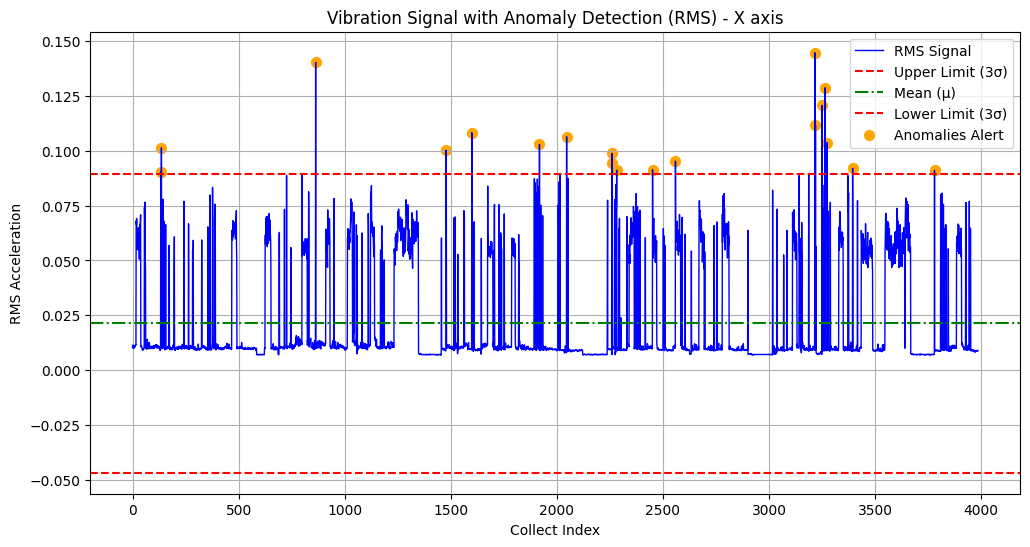

Mean: 0.02, Standard Deviation: 0.04
Upper Limit: 0.14, Lower Limit: -0.09
Number of anomalies detected: 33


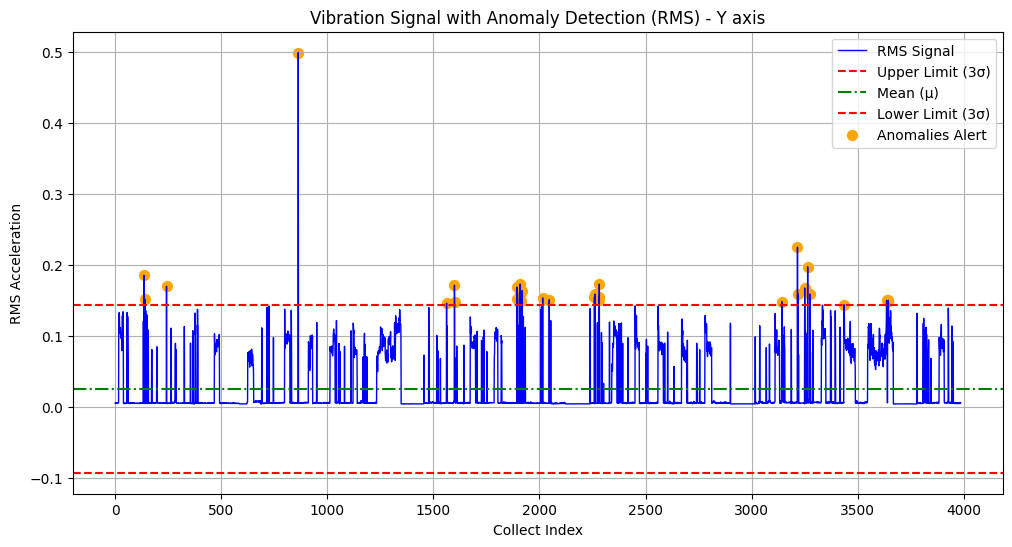

Mean: 0.02, Standard Deviation: 0.02
Upper Limit: 0.07, Lower Limit: -0.03
Number of anomalies detected: 52


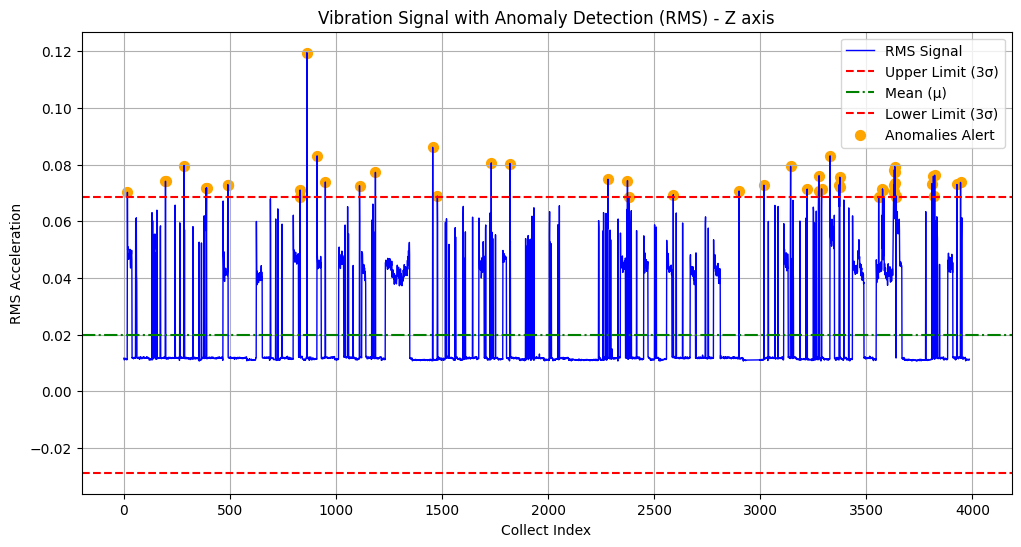

_________________________________________________________________________________________________________________________________________


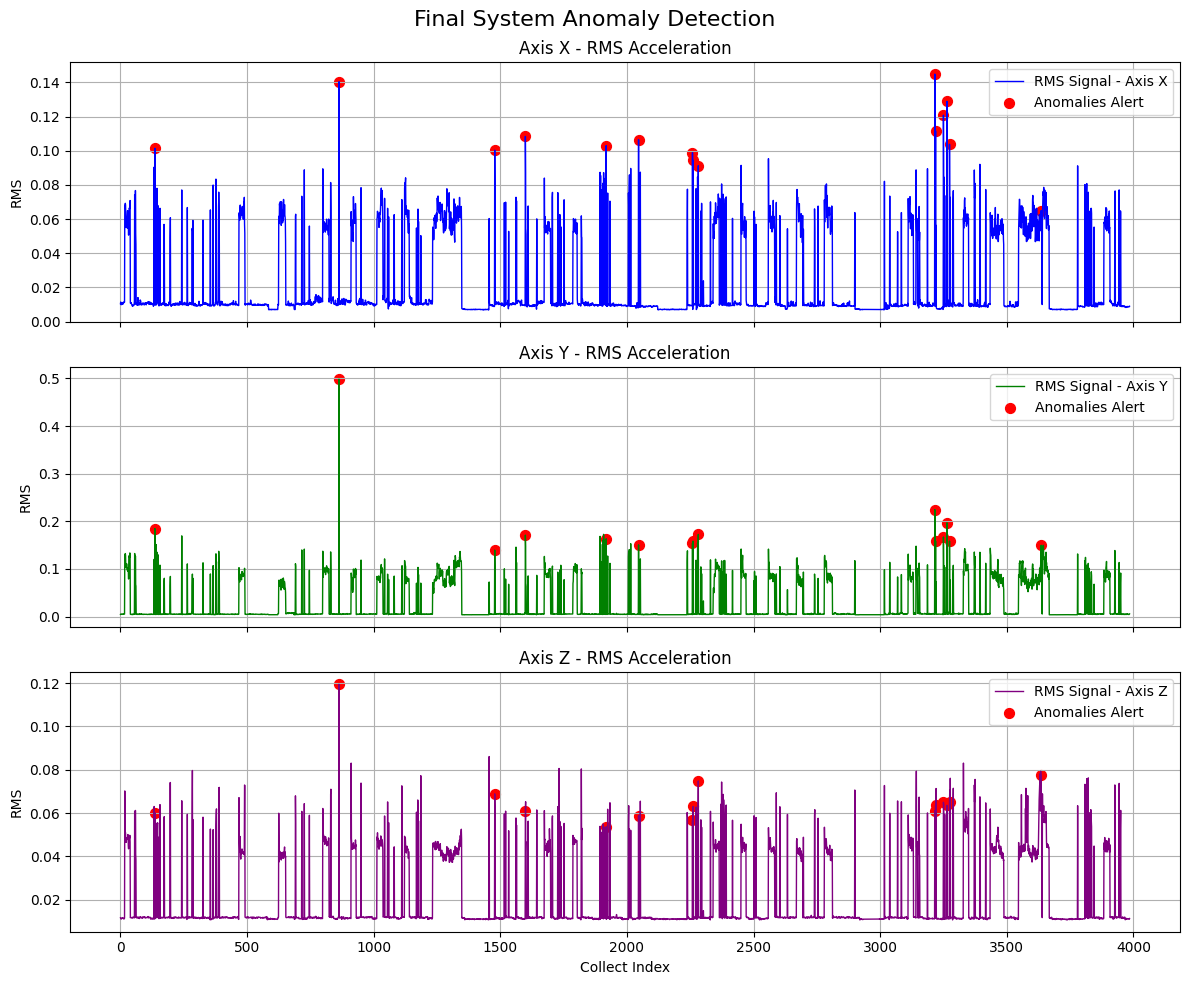

Analysis for LZY4270
Mean: 0.03, Standard Deviation: 0.01
Upper Limit: 0.05, Lower Limit: 0.00
Number of anomalies detected: 0


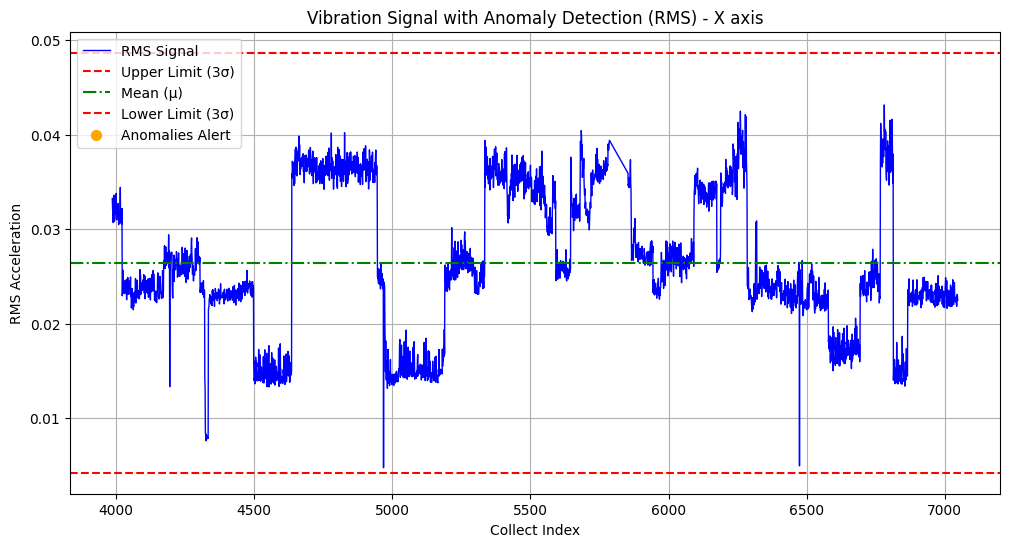

Mean: 0.03, Standard Deviation: 0.01
Upper Limit: 0.05, Lower Limit: 0.01
Number of anomalies detected: 2


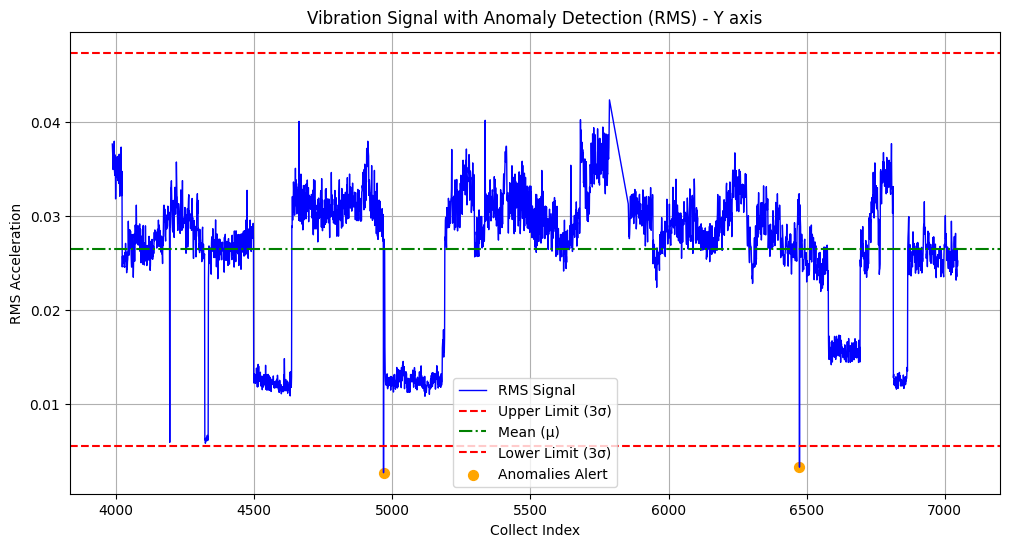

Mean: 0.02, Standard Deviation: 0.00
Upper Limit: 0.03, Lower Limit: 0.01
Number of anomalies detected: 2


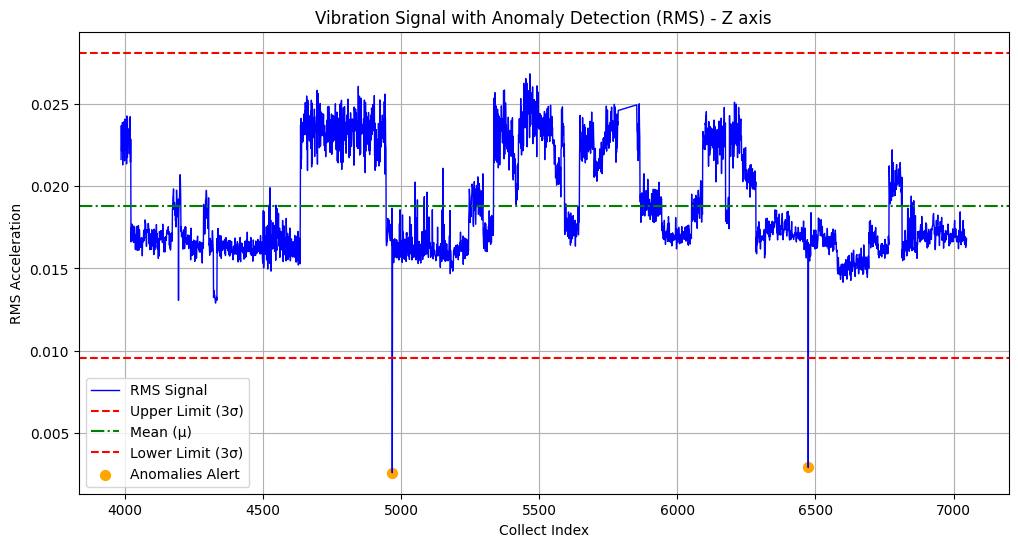

_________________________________________________________________________________________________________________________________________


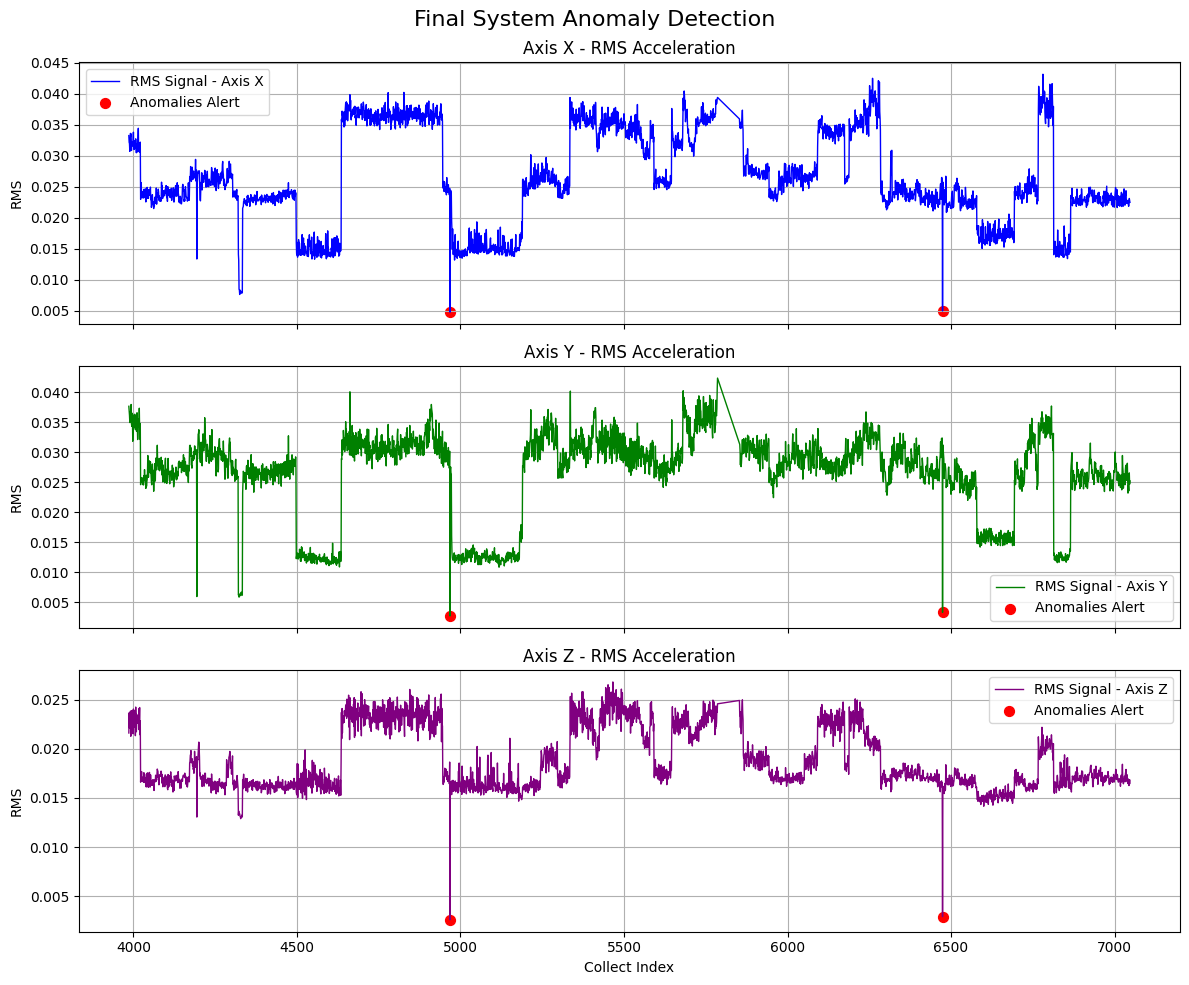

Analysis for MUR8453
Mean: 0.02, Standard Deviation: 0.00
Upper Limit: 0.03, Lower Limit: 0.02
Number of anomalies detected: 21


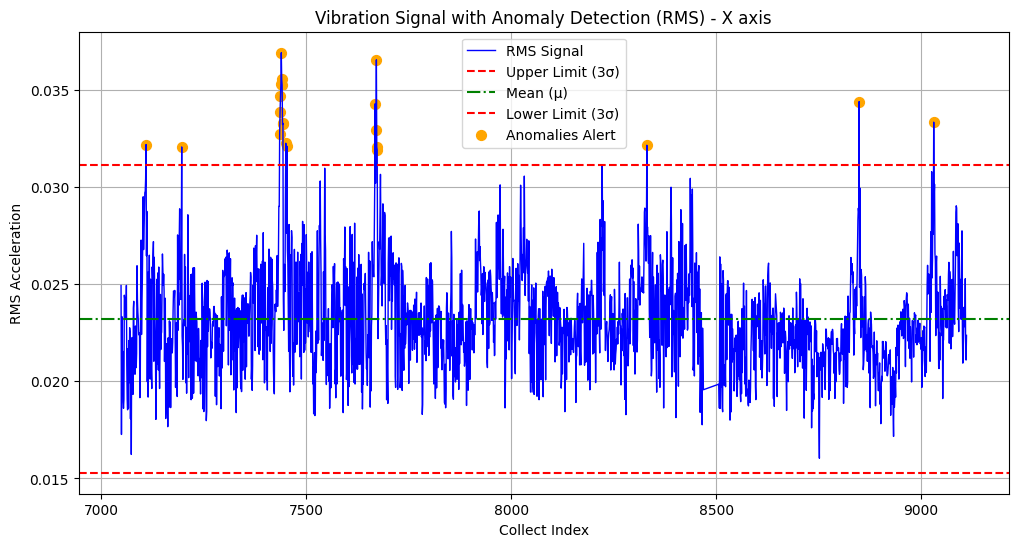

Mean: 0.02, Standard Deviation: 0.00
Upper Limit: 0.03, Lower Limit: 0.01
Number of anomalies detected: 19


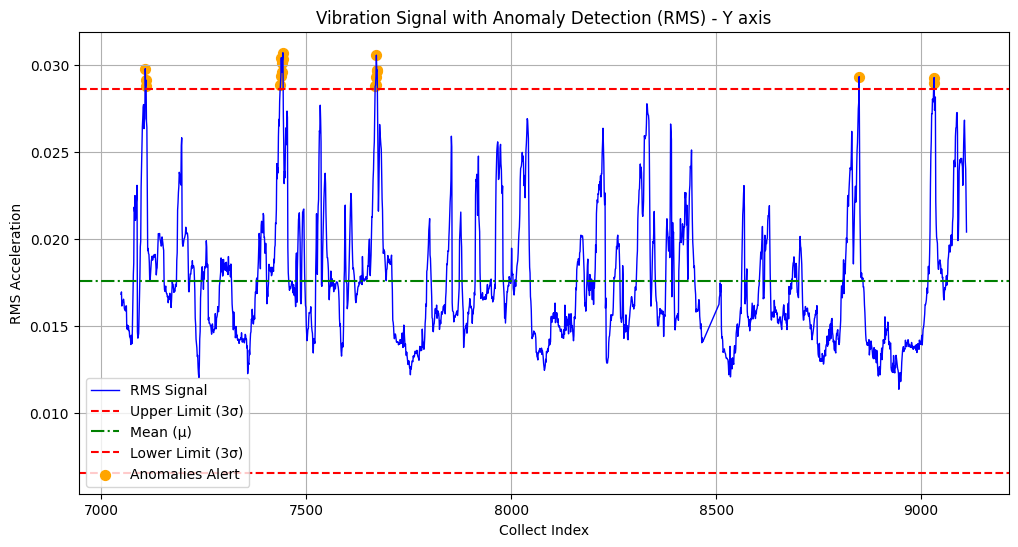

Mean: 0.04, Standard Deviation: 0.01
Upper Limit: 0.06, Lower Limit: 0.02
Number of anomalies detected: 18


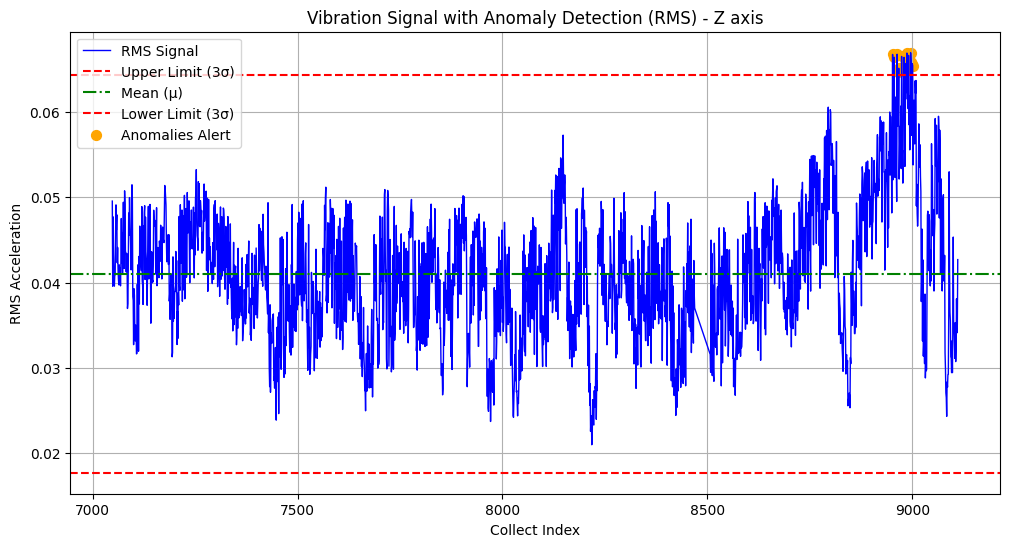

_________________________________________________________________________________________________________________________________________


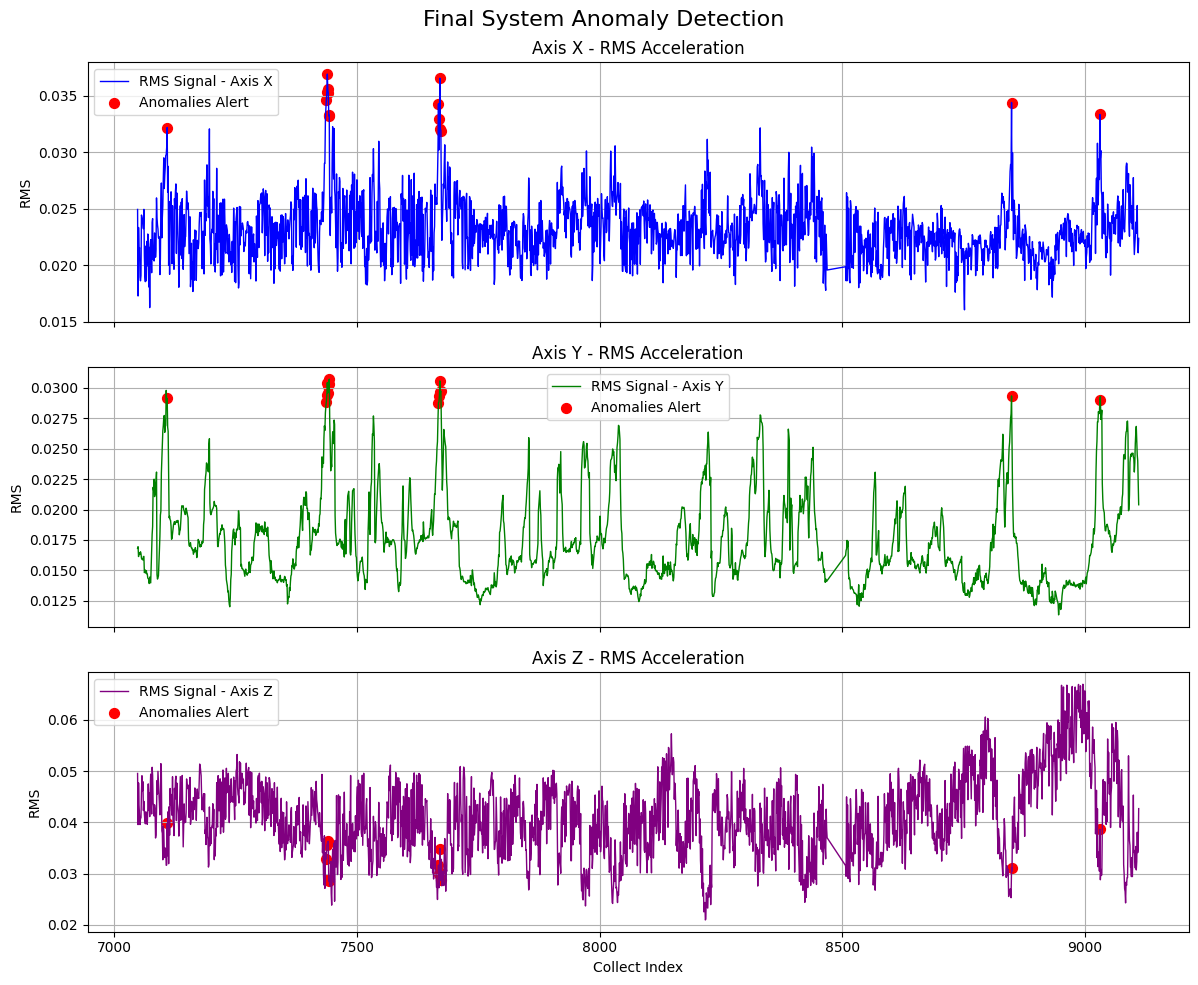

Analysis for MXK6435
Mean: 0.01, Standard Deviation: 0.01
Upper Limit: 0.04, Lower Limit: -0.02
Number of anomalies detected: 78


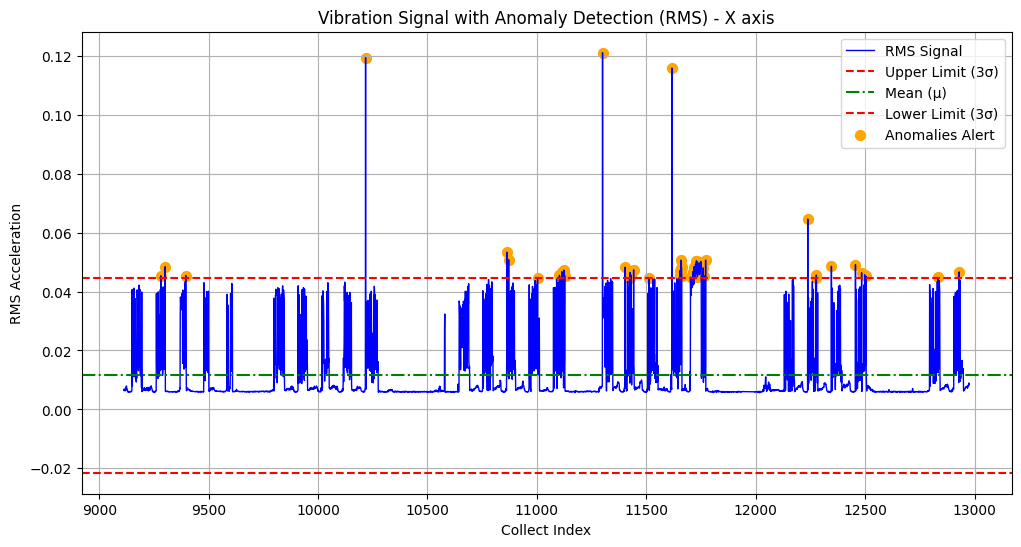

Mean: 0.01, Standard Deviation: 0.01
Upper Limit: 0.03, Lower Limit: -0.01
Number of anomalies detected: 12


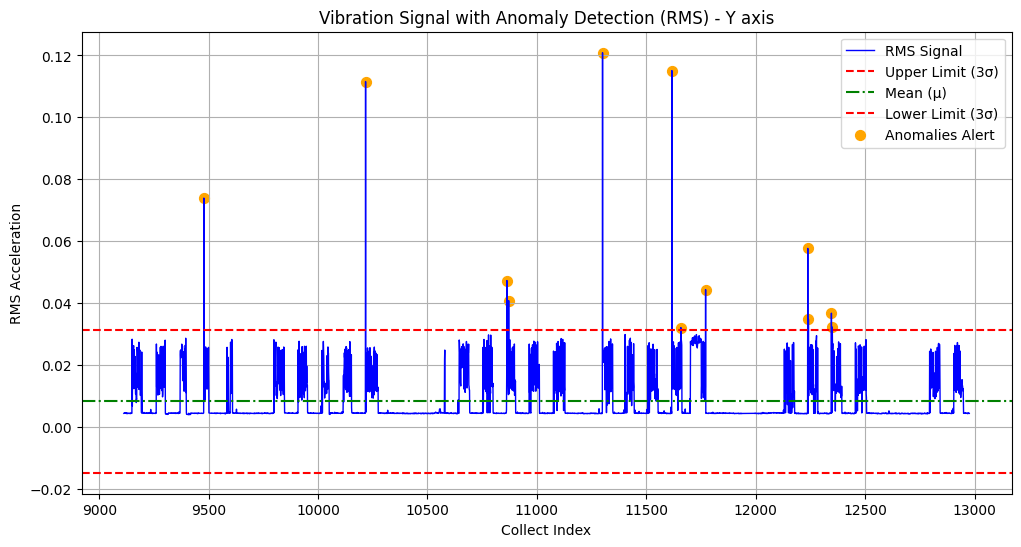

Mean: 0.01, Standard Deviation: 0.01
Upper Limit: 0.04, Lower Limit: -0.01
Number of anomalies detected: 59


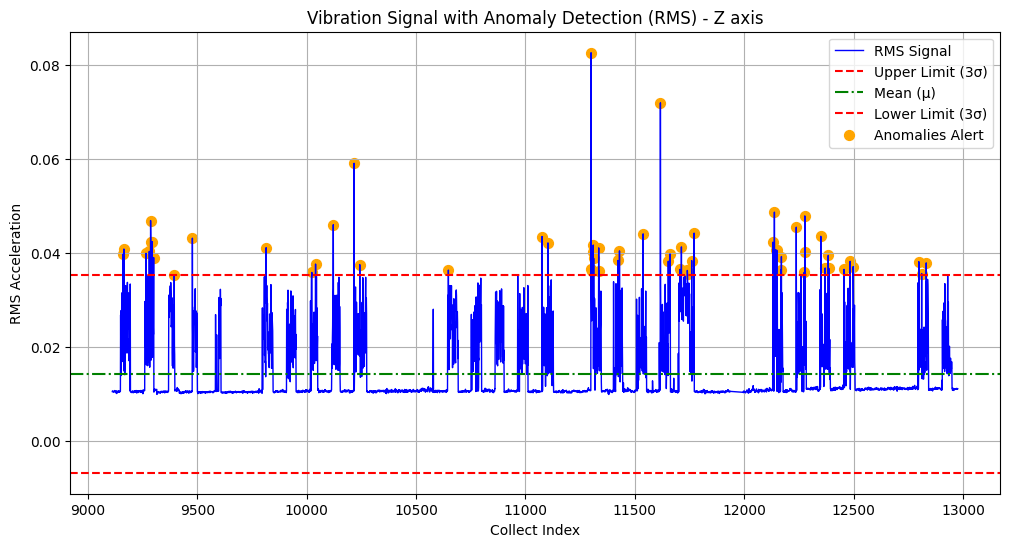

_________________________________________________________________________________________________________________________________________


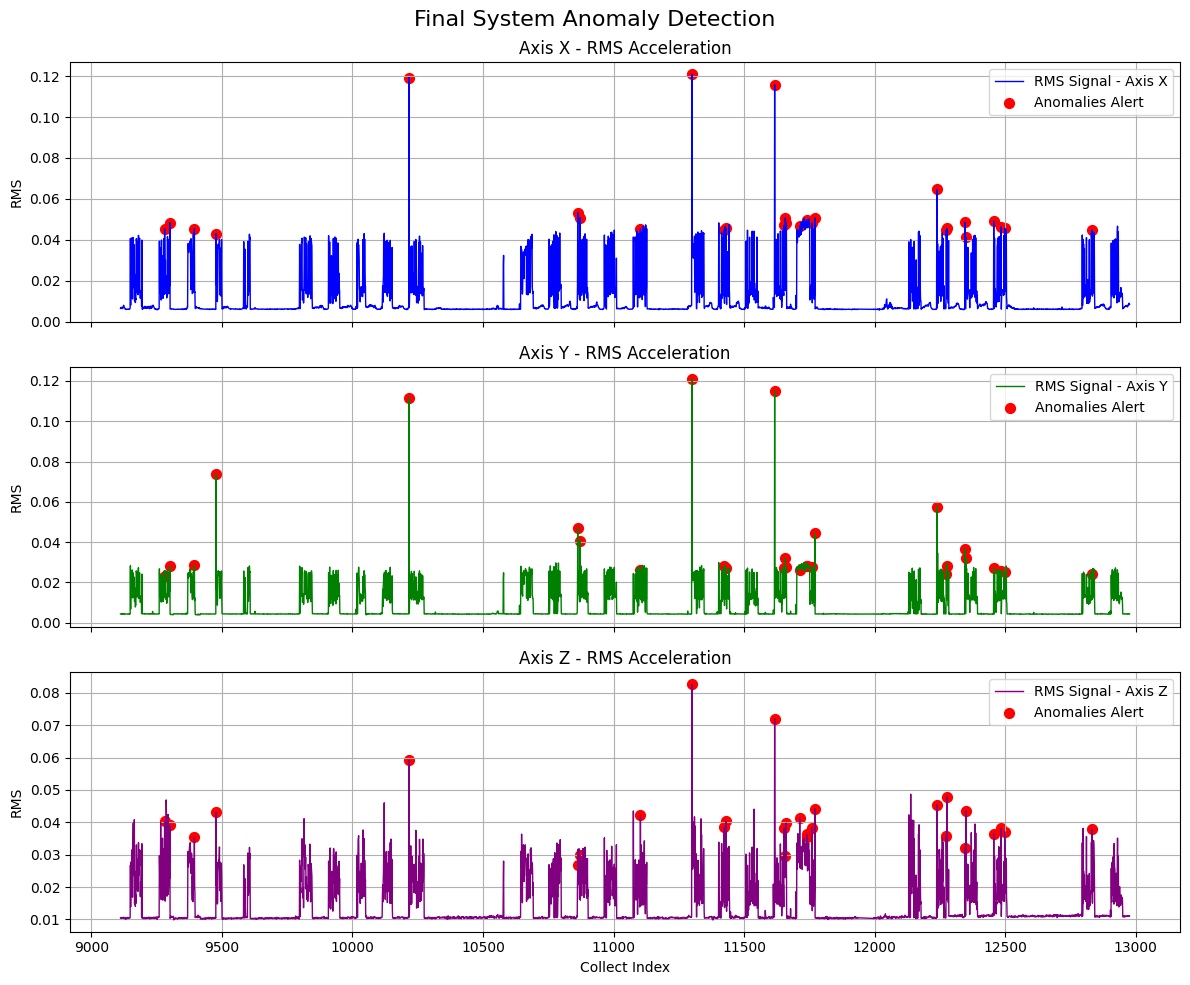

Analysis for MYD8706
Mean: 0.11, Standard Deviation: 0.12
Upper Limit: 0.47, Lower Limit: -0.25
Number of anomalies detected: 0


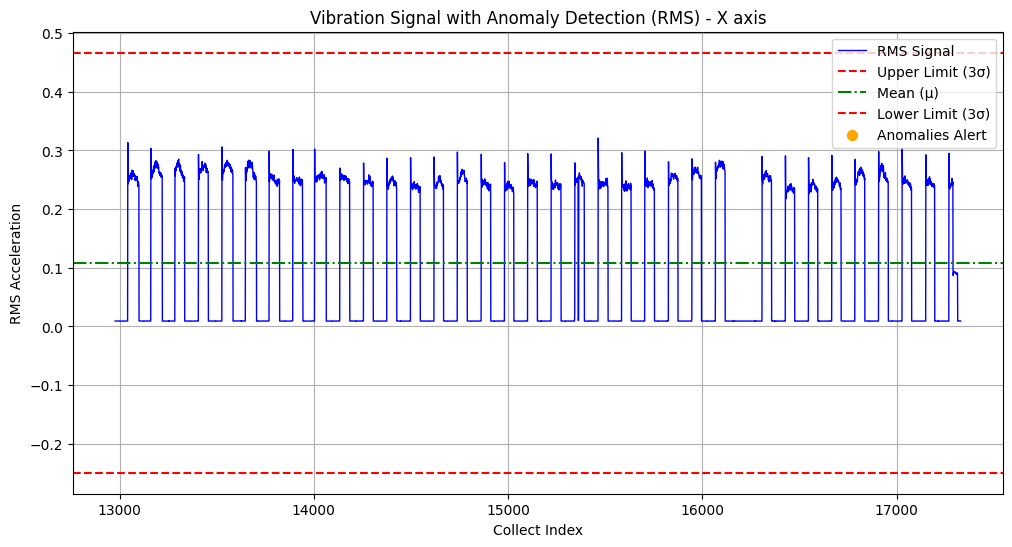

Mean: 0.09, Standard Deviation: 0.10
Upper Limit: 0.37, Lower Limit: -0.20
Number of anomalies detected: 0


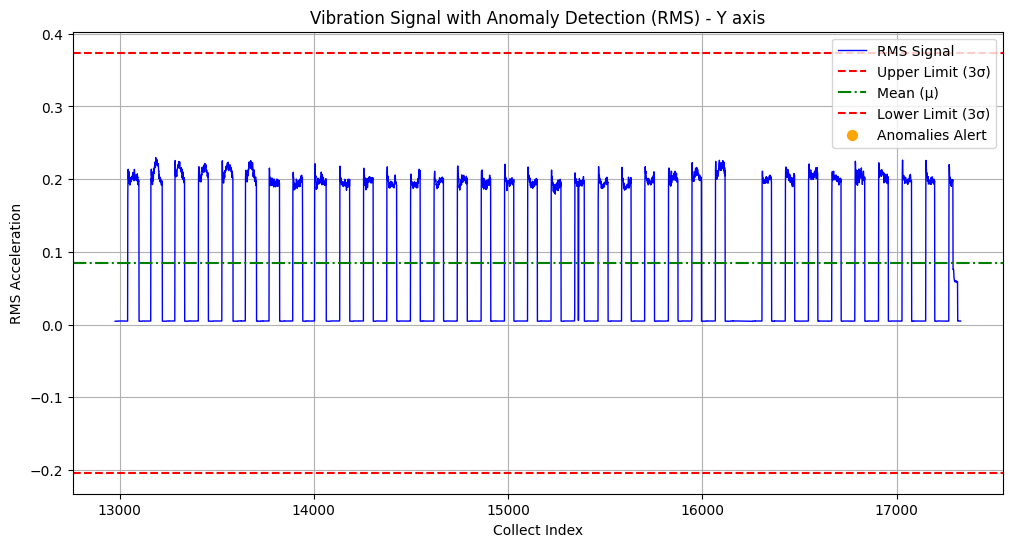

Mean: 0.09, Standard Deviation: 0.09
Upper Limit: 0.37, Lower Limit: -0.19
Number of anomalies detected: 0


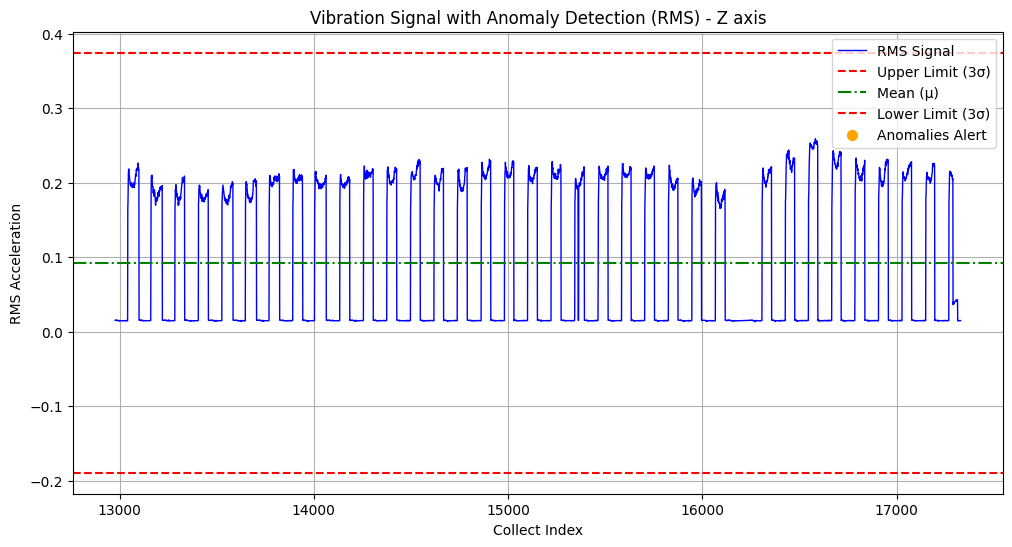

_________________________________________________________________________________________________________________________________________


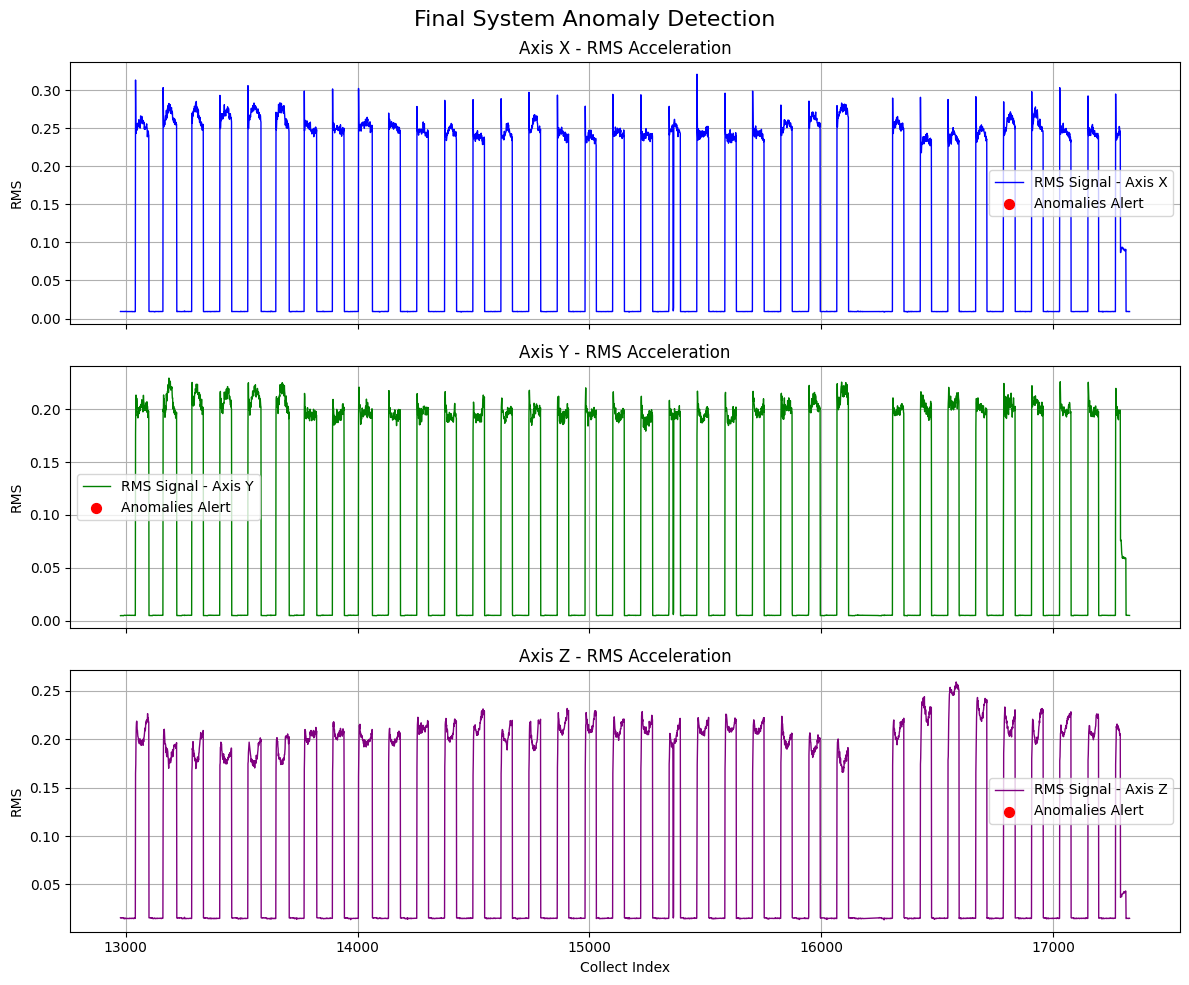

Analysis for MYS2071
Mean: 0.07, Standard Deviation: 0.00
Upper Limit: 0.08, Lower Limit: 0.07
Number of anomalies detected: 2


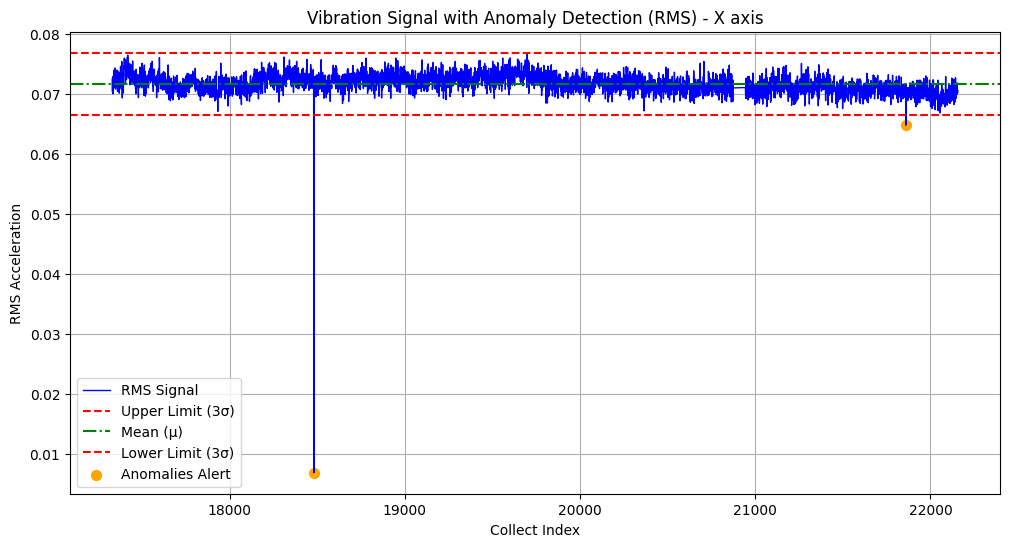

Mean: 0.06, Standard Deviation: 0.01
Upper Limit: 0.08, Lower Limit: 0.04
Number of anomalies detected: 63


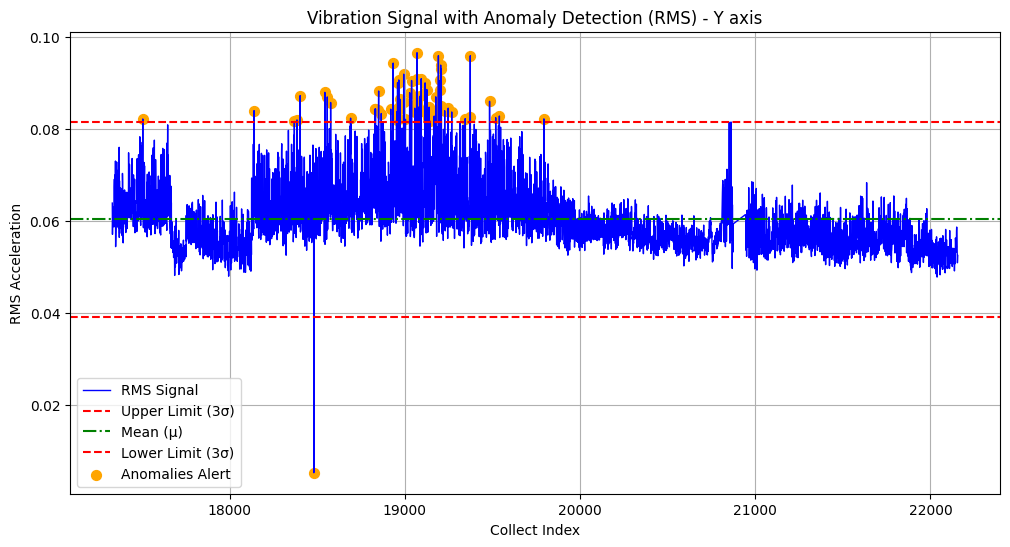

Mean: 0.08, Standard Deviation: 0.00
Upper Limit: 0.10, Lower Limit: 0.07
Number of anomalies detected: 19


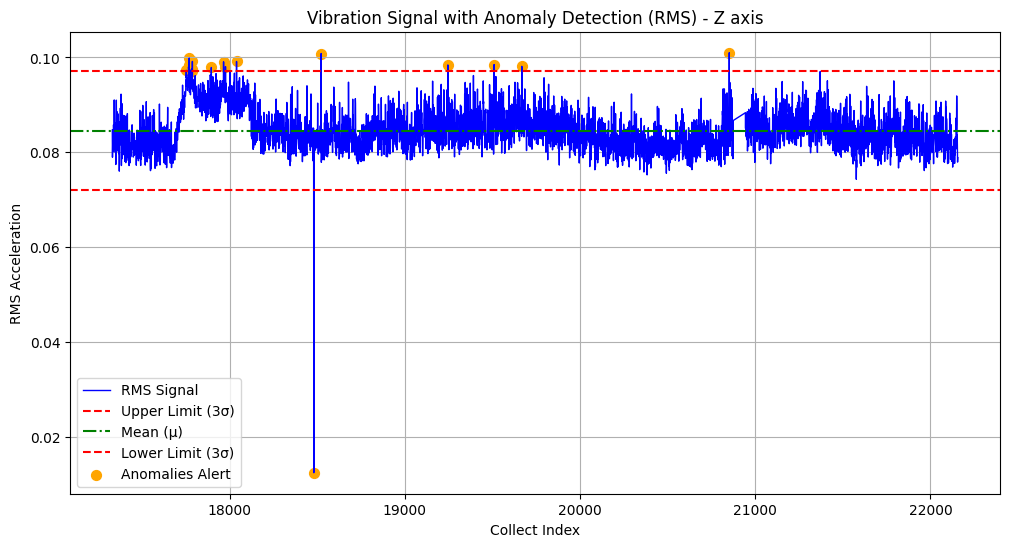

_________________________________________________________________________________________________________________________________________


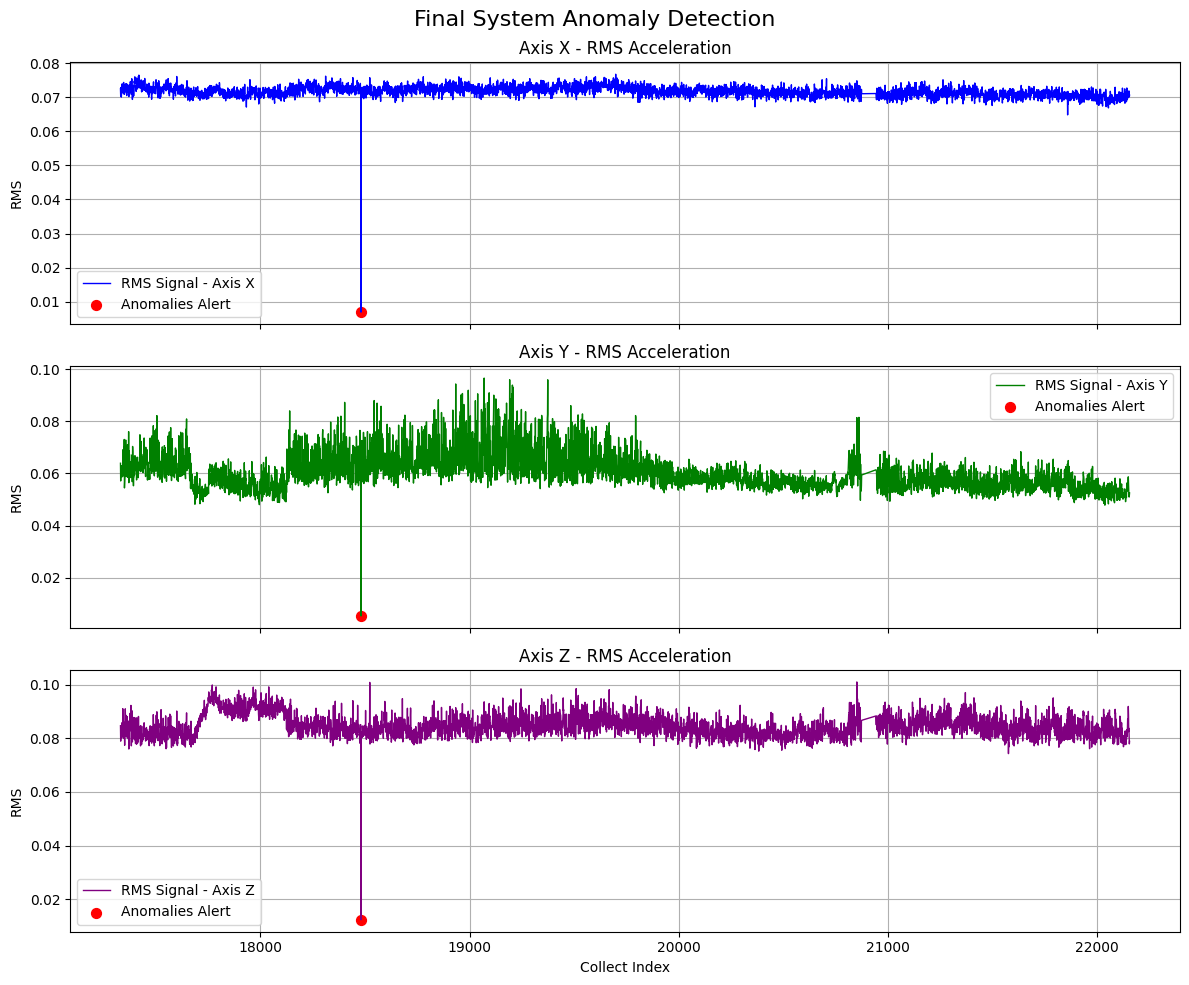

Analysis for MZU6388
Mean: 0.02, Standard Deviation: 0.03
Upper Limit: 0.11, Lower Limit: -0.08
Number of anomalies detected: 8


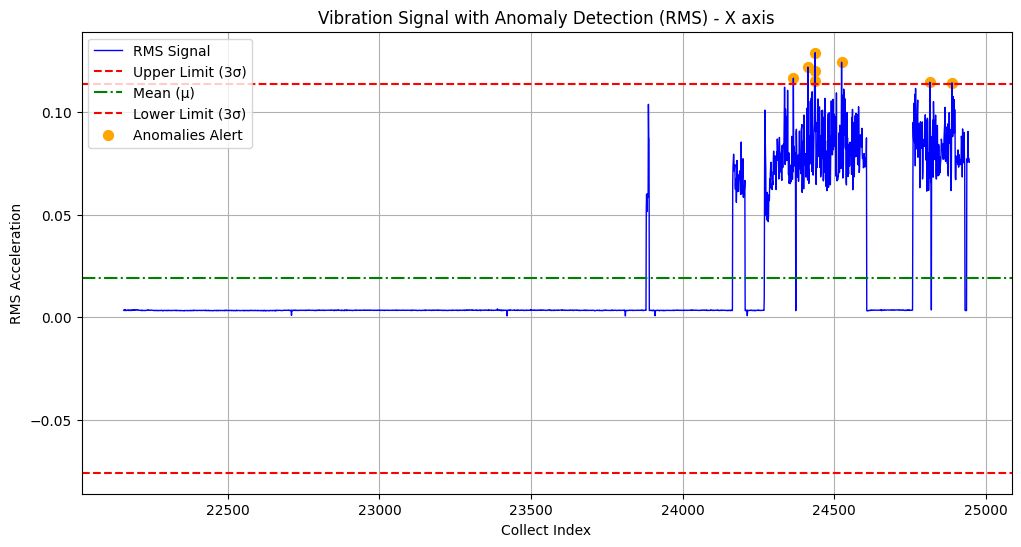

Mean: 0.02, Standard Deviation: 0.04
Upper Limit: 0.13, Lower Limit: -0.09
Number of anomalies detected: 59


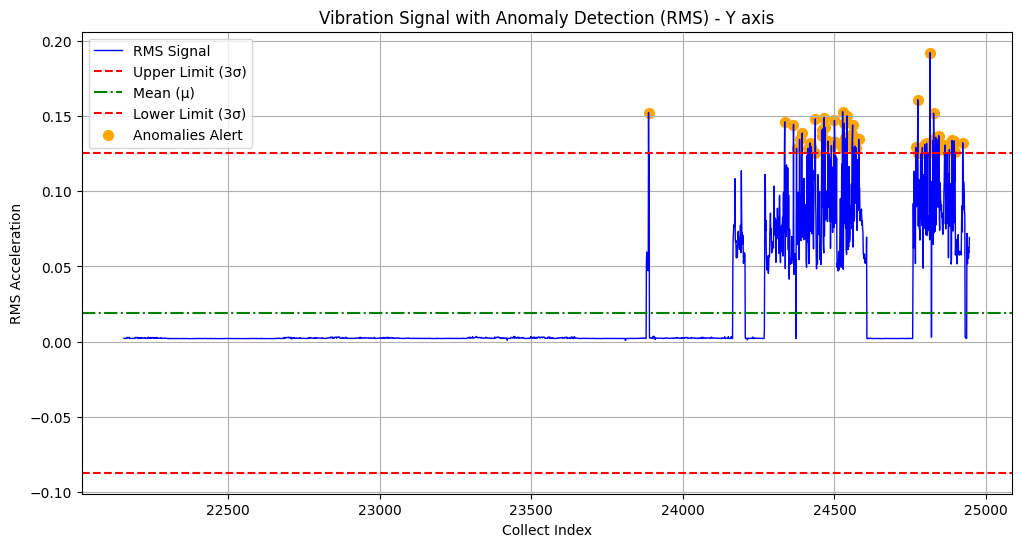

Mean: 0.03, Standard Deviation: 0.06
Upper Limit: 0.20, Lower Limit: -0.14
Number of anomalies detected: 38


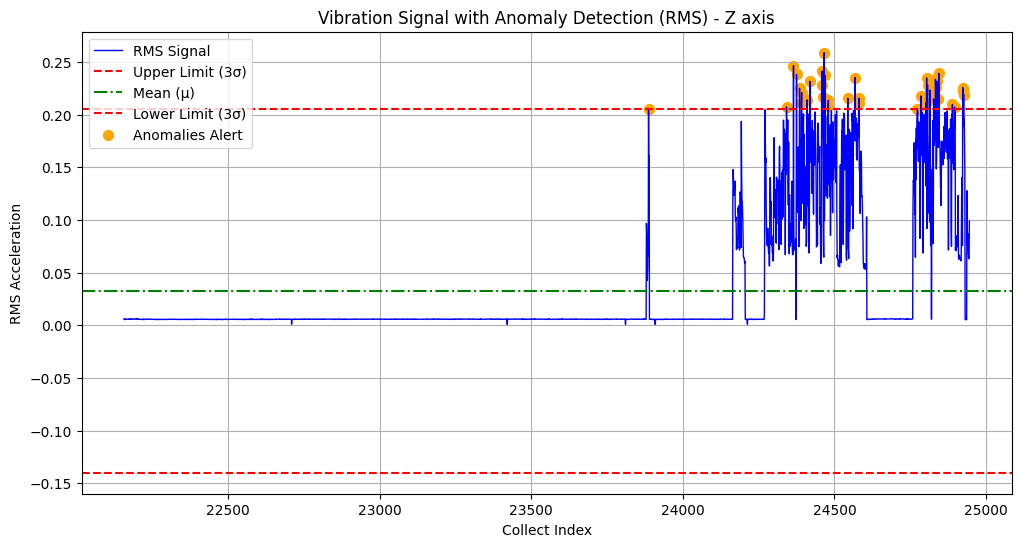

_________________________________________________________________________________________________________________________________________


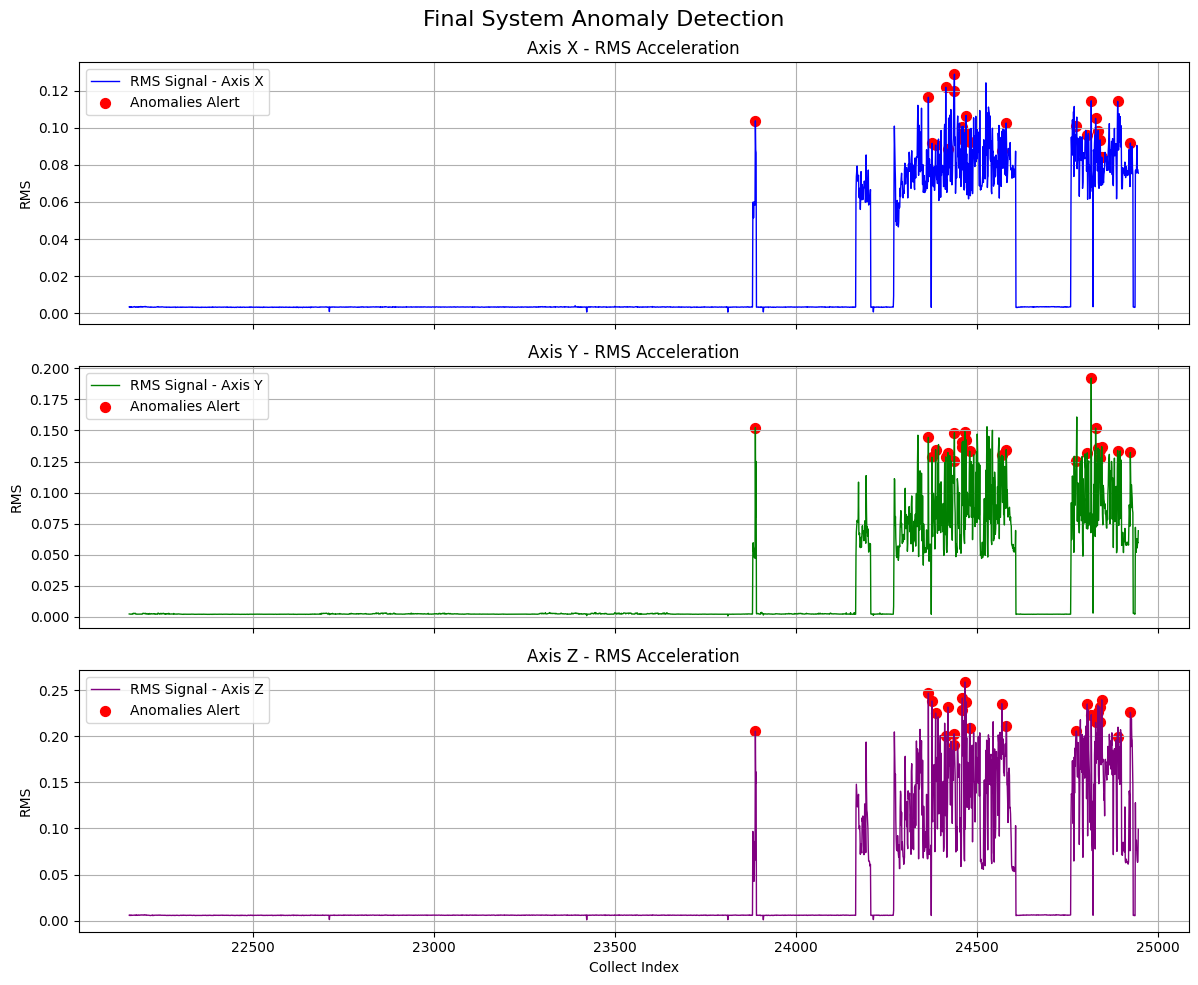

Analysis for NAH4736
Mean: 0.08, Standard Deviation: 0.02
Upper Limit: 0.15, Lower Limit: 0.01
Number of anomalies detected: 163


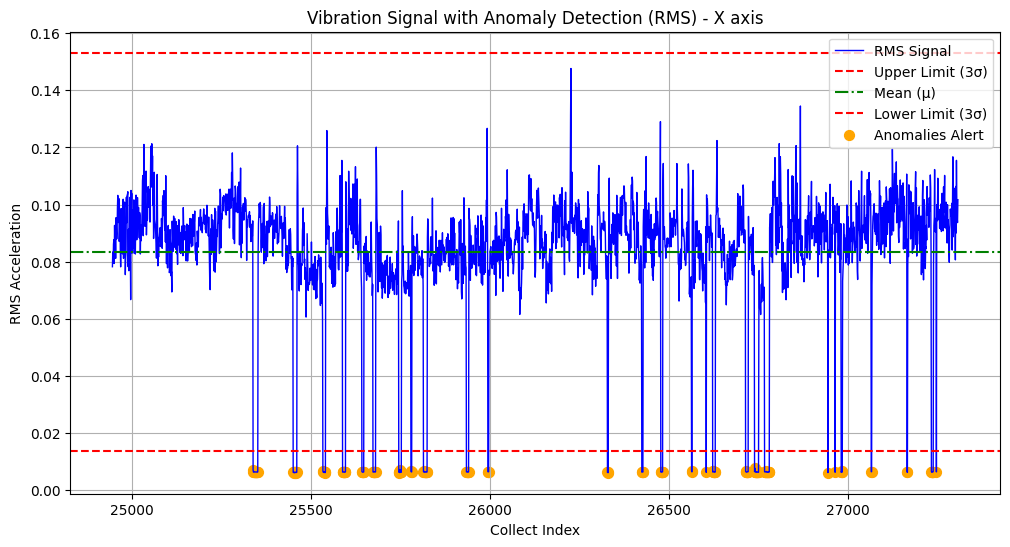

Mean: 0.12, Standard Deviation: 0.03
Upper Limit: 0.23, Lower Limit: 0.02
Number of anomalies detected: 163


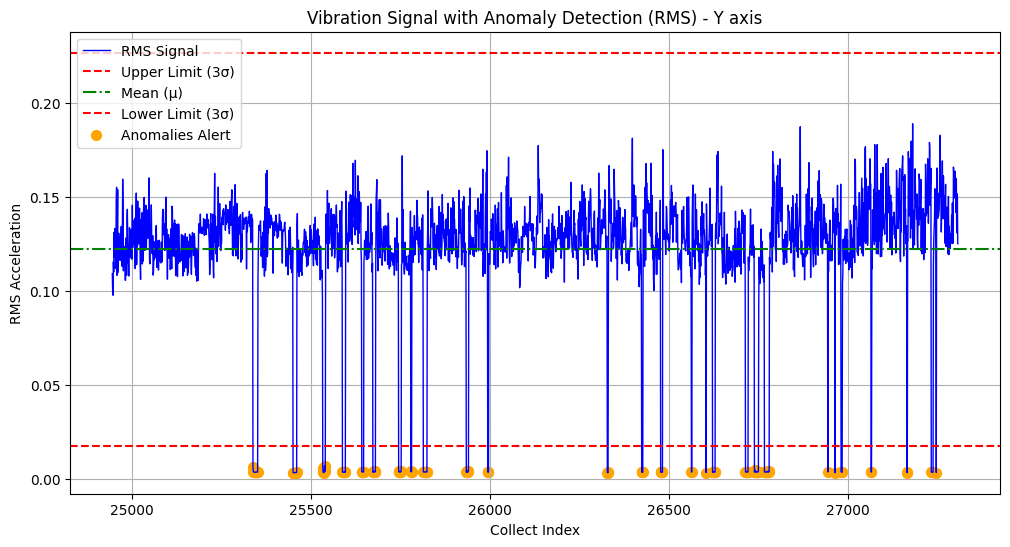

Mean: 0.17, Standard Deviation: 0.07
Upper Limit: 0.38, Lower Limit: -0.05
Number of anomalies detected: 17


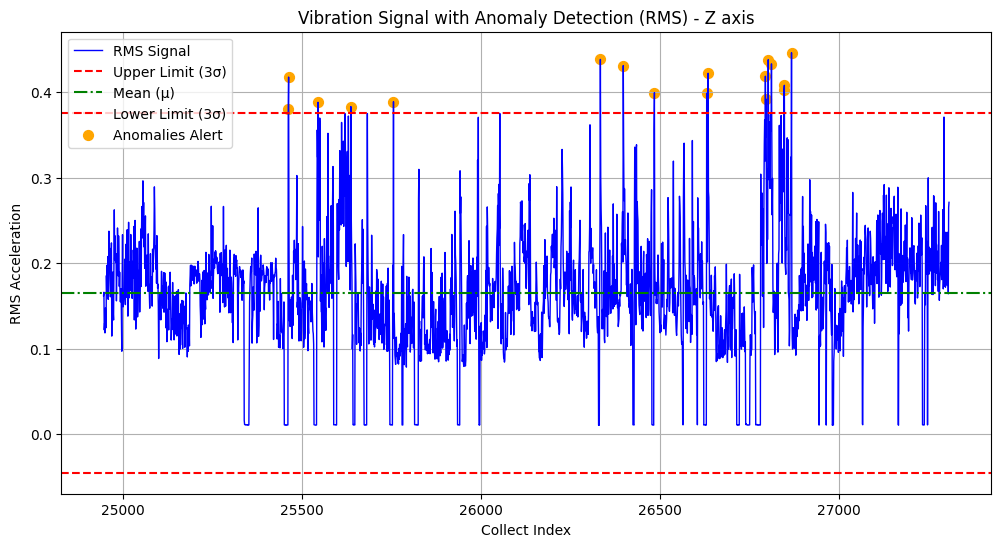

_________________________________________________________________________________________________________________________________________


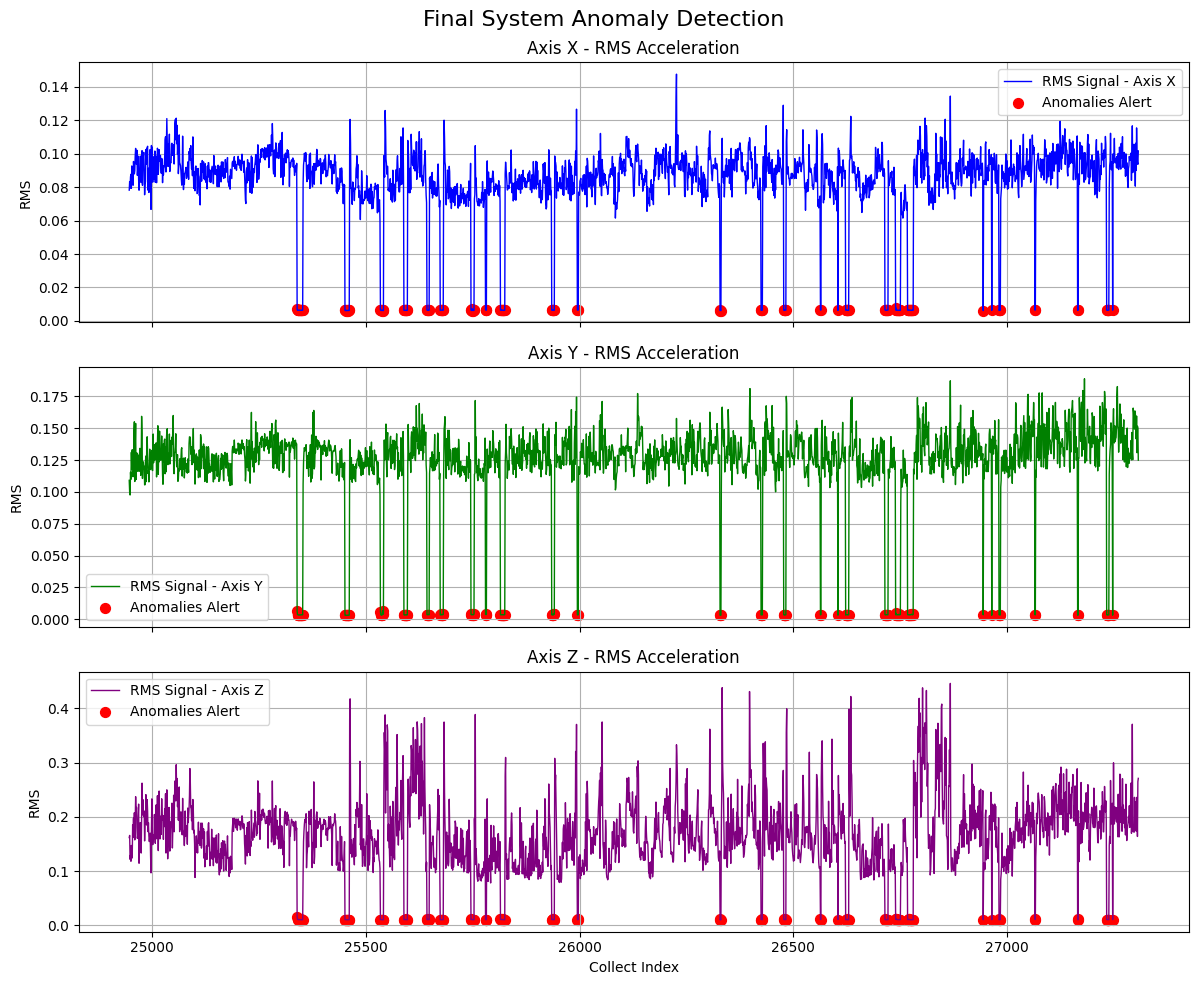

Analysis for NAI1549
Mean: 0.01, Standard Deviation: 0.01
Upper Limit: 0.03, Lower Limit: -0.01
Number of anomalies detected: 0


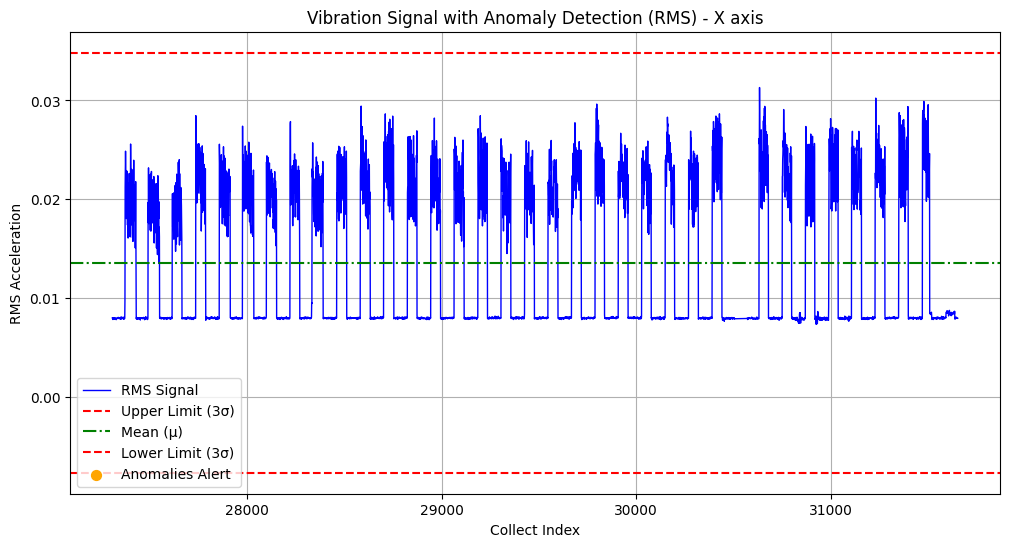

Mean: 0.03, Standard Deviation: 0.03
Upper Limit: 0.11, Lower Limit: -0.06
Number of anomalies detected: 0


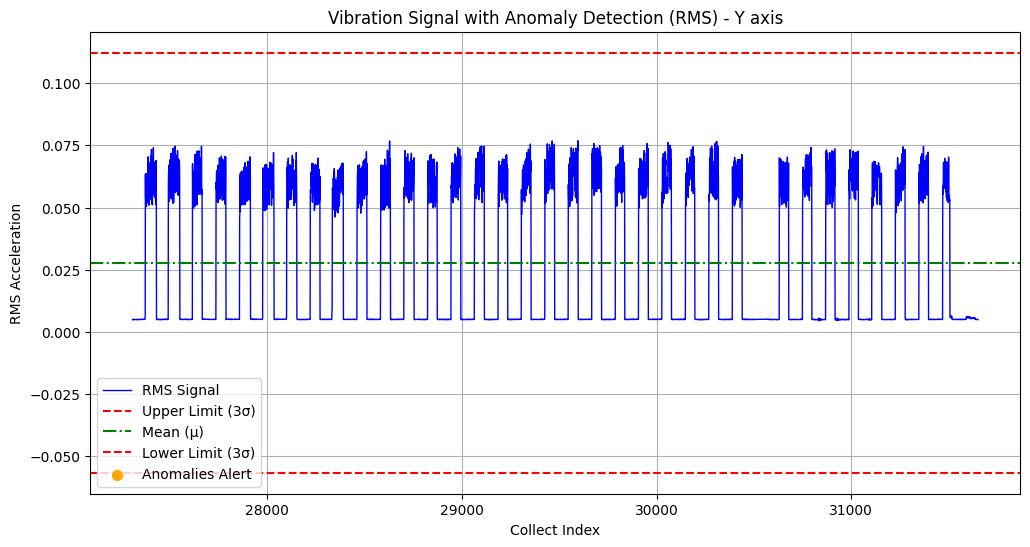

Mean: 0.01, Standard Deviation: 0.00
Upper Limit: 0.02, Lower Limit: 0.01
Number of anomalies detected: 15


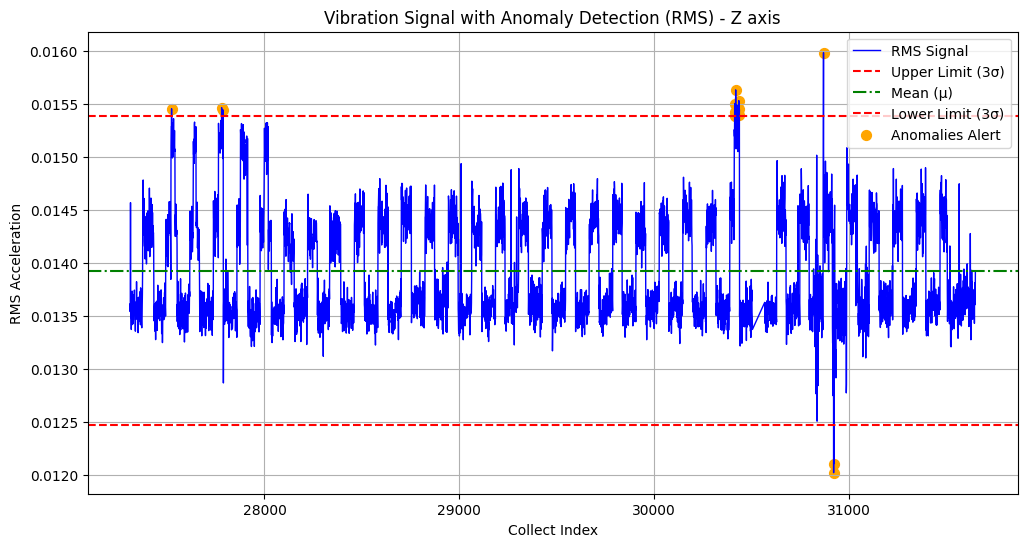

_________________________________________________________________________________________________________________________________________


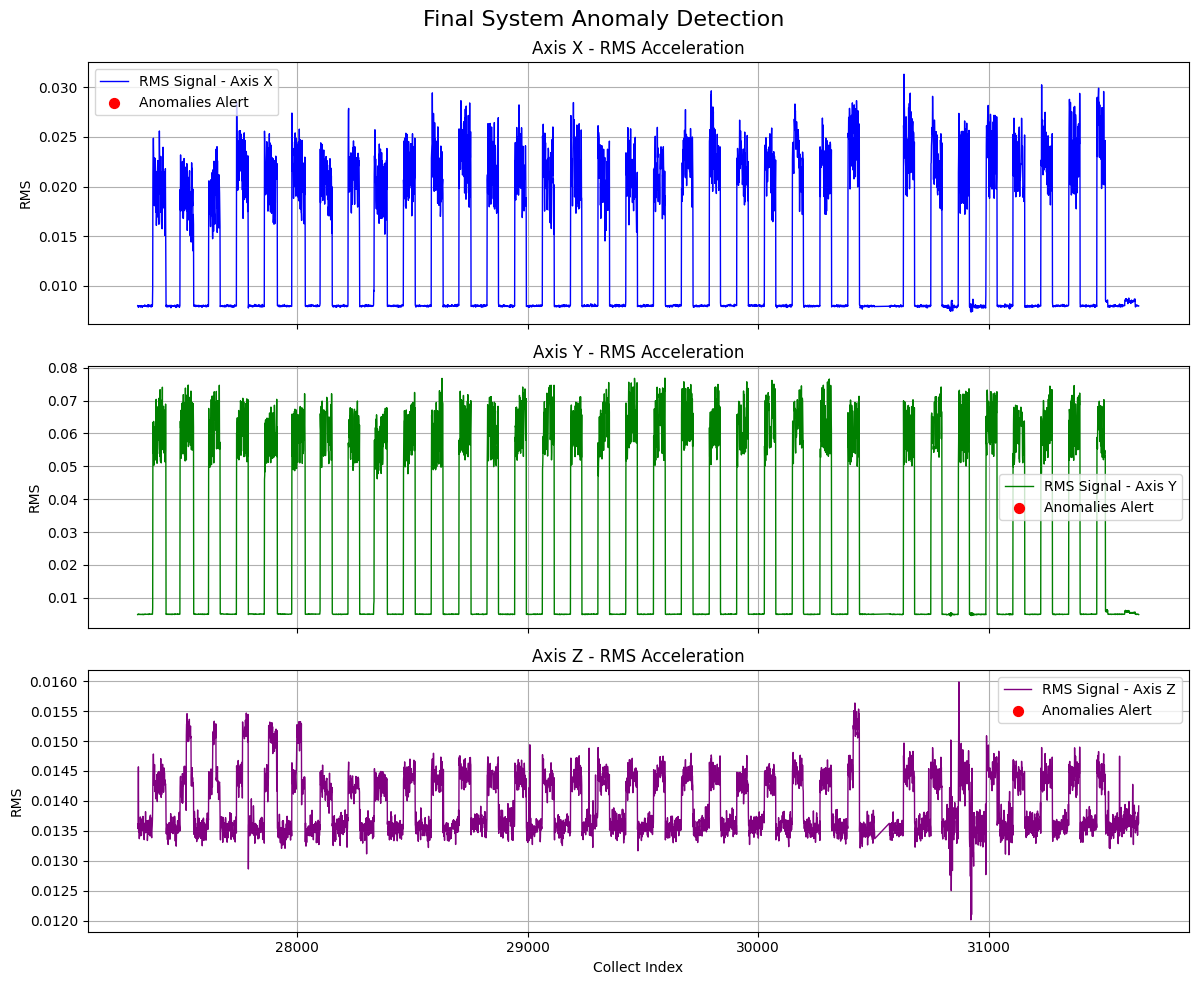

Analysis for NEW4797
Mean: 0.04, Standard Deviation: 0.03
Upper Limit: 0.12, Lower Limit: -0.05
Number of anomalies detected: 2


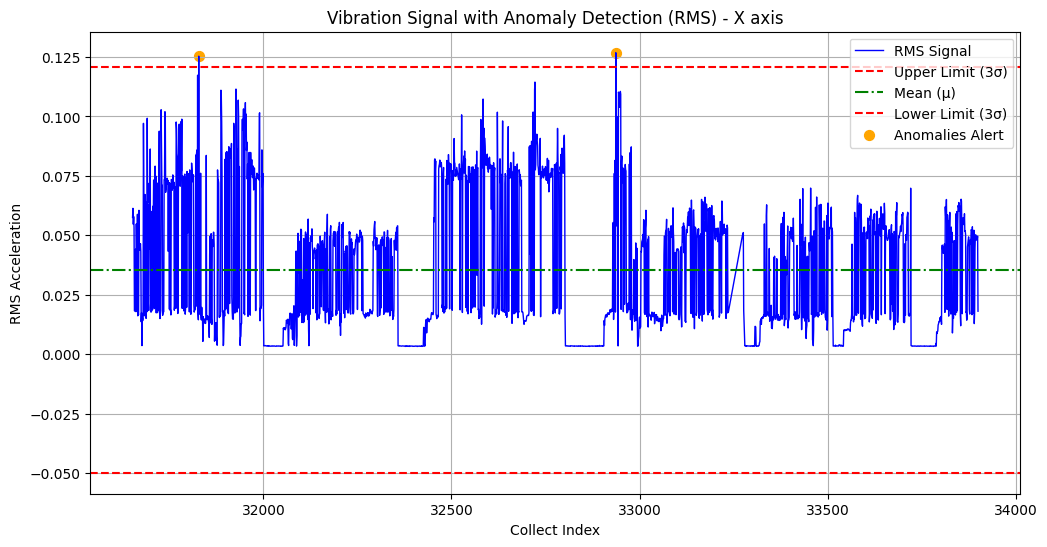

Mean: 0.08, Standard Deviation: 0.08
Upper Limit: 0.32, Lower Limit: -0.17
Number of anomalies detected: 0


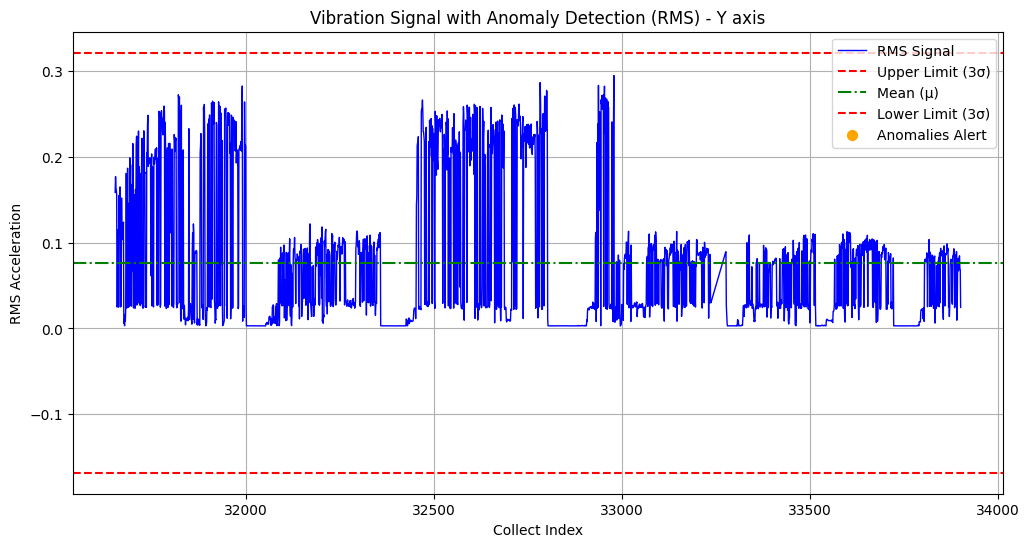

Mean: 0.05, Standard Deviation: 0.04
Upper Limit: 0.16, Lower Limit: -0.07
Number of anomalies detected: 0


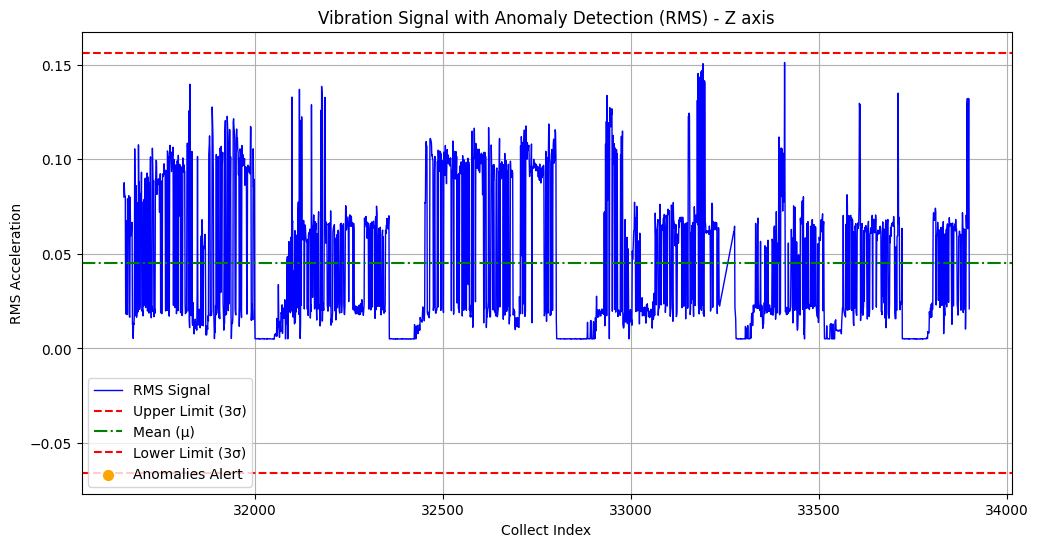

_________________________________________________________________________________________________________________________________________


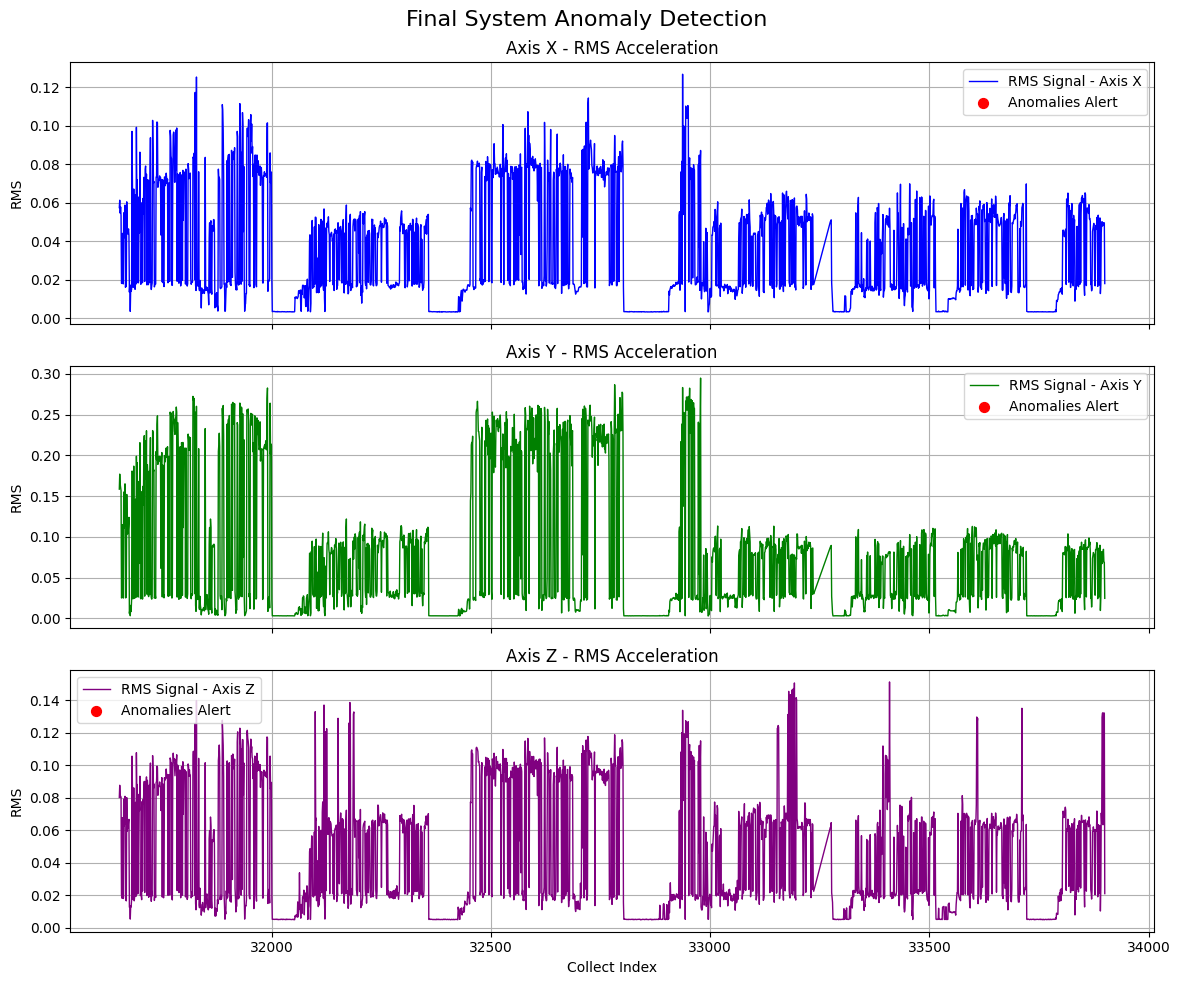

In [ ]:
assets = df_assets['sensors'].tolist()

for asset in assets:
  print(f'Analysis for {asset}')
  detect_anomaly_asset(asset)

In [ ]:
def detect_anomaly_asset(asset):
  filtered_df = merged_df[merged_df['sensorId'] == asset]

  accelRMS_x = pd.Series(filtered_df['params.accelRMS.x'].dropna())
  anomalies_x_axis = signal_anomaly_detection(accelRMS_x, 'X')
  accelRMS_y = pd.Series(filtered_df['params.accelRMS.y'].dropna())
  anomalies_y_axis = signal_anomaly_detection(accelRMS_y, 'Y')
  accelRMS_z = pd.Series(filtered_df['params.accelRMS.z'].dropna())
  anomalies_z_axis = signal_anomaly_detection(accelRMS_z, 'Z')

  all_lists = list(anomalies_x_axis.index) + list(anomalies_y_axis.index) + list(anomalies_z_axis.index)

  counter = Counter(all_lists)

  # Anomaly is considered when it is classified in at least 2 axis
  anomalies_asset_detected = [item for item, count in counter.items() if count >= 2]

  plot_system_result(accelRMS_x, accelRMS_y, accelRMS_z ,anomalies_asset_detected)

In [ ]:
def signal_anomaly_detection (signal, axis, result_plot=True):
    # Cálculo da média e do desvio-padrão
    mean = signal.mean()
    std_dev = signal.std()

    # Definindo limites de 3 desvios-padrão
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev

    # Identificando valores fora da faixa (potenciais falhas)
    anomalies = signal[(signal < lower_limit) | (signal > upper_limit)]

    # Exibindo os resultados
    print(f'Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}')
    print(f'Upper Limit: {upper_limit:.2f}, Lower Limit: {lower_limit:.2f}')
    print(f'Number of anomalies detected: {len(anomalies)}')

    if result_plot == True:
      # Plotando o sinal com anomalias marcadas
      plt.figure(figsize=(12, 6))

      # Plotando o sinal completo
      plt.plot(signal, label='RMS Signal', color='blue', linewidth=1)

      # Plotando as linhas dos limites superior e inferior
      plt.axhline(upper_limit, color='red', linestyle='--', label='Upper Limit (3σ)')
      plt.axhline(mean, color='green', linestyle='-.', label='Mean (μ)')
      plt.axhline(lower_limit, color='red', linestyle='--', label='Lower Limit (3σ)')

      plt.scatter(anomalies.index, anomalies, color='orange', s=50, marker='o', label='Anomalies Alert')

      plt.title(f'Vibration Signal with Anomaly Detection (RMS) - {axis} axis')
      plt.xlabel('Collect Index')
      plt.ylabel('RMS Acceleration')
      plt.legend()
      plt.grid(True)

      plt.show()

      return anomalies

In [ ]:
def plot_system_result(signal_x, signal_y, signal_z, anomalies):
    print("_________________________________________________________________________________________________________________________________________")

    fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    fig.suptitle("Final System Anomaly Detection", fontsize=16)

    # Signal plot on the X axis
    axs[0].plot(signal_x, label='RMS Signal - Axis X', color='blue', linewidth=1)
    axs[0].scatter(anomalies, signal_x[anomalies], color='red', s=50, marker='o', label='Anomalies Alert')
    axs[0].set_title('Axis X - RMS Acceleration')
    axs[0].set_ylabel('RMS')
    axs[0].legend()
    axs[0].grid(True)

    # Signal plot on the Y axis
    axs[1].plot(signal_y, label='RMS Signal - Axis Y', color='green', linewidth=1)
    axs[1].scatter(anomalies, signal_y[anomalies], color='red', s=50, marker='o', label='Anomalies Alert')
    axs[1].set_title('Axis Y - RMS Acceleration')
    axs[1].set_ylabel('RMS')
    axs[1].legend()
    axs[1].grid(True)

    # Signal plot on the Z axis
    axs[2].plot(signal_z, label='RMS Signal - Axis Z', color='purple', linewidth=1)
    axs[2].scatter(anomalies, signal_z[anomalies], color='red', s=50, marker='o', label='Anomalies Alert')
    axs[2].set_title('Axis Z - RMS Acceleration')
    axs[2].set_xlabel('Collect Index')
    axs[2].set_ylabel('RMS')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()

    plt.show()